TEM-1-beta-Lactamase

1. Einlesen, Normieren und Mergen der Datensätze

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# Einlesen der Datensätze (Stiffler, Firnberg & Deng)
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv', delimiter=';')
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv', delimiter=';')
data_deng: pd.DataFrame = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter=';')

In [9]:
#DMS-Score-Spalten zu floats konvertieren:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)

In [10]:
#Mutanten in einheitlicher Reihenfolge speichern (alle Datensätze enthalten Mutanten von Position 24 bis 286, bei Firnberg fehlen jedoch einige)
sortierung = data_deng.iloc[0:len(data_deng), 0]
sortierung = sortierung.tolist()

#DataFrame Struktur bauen
columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame(columns=columns, index=index)

#DataFrame füllen
for i in range(0, len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant] = score
for i in range(0, len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]
    merged['Deng'][mutant] = score
for i in range(0, len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant] = score

#merged DataFrame enthält für alle MUtanten nicht-normierte Fitnesswerte aus den drei Datensätzen
merged.head()

Stiffler      Deng Firnberg
H24C  -0.41826 -3.924478   0.5646
H24Y -0.885025 -2.170022   0.7054
H24W -1.347586 -4.345218   0.6021
H24V -0.026874 -3.011503   1.2224
H24T -0.067188 -1.565248   1.2289

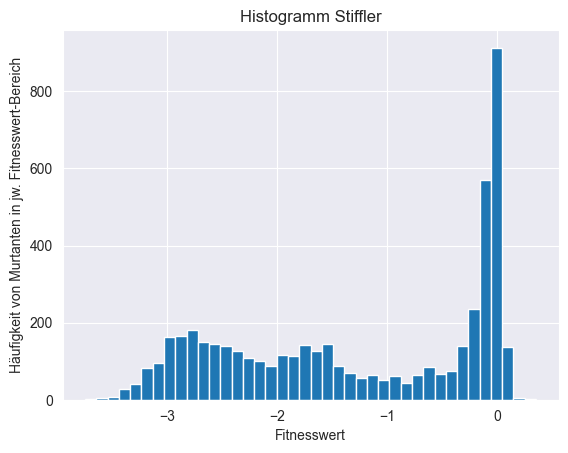

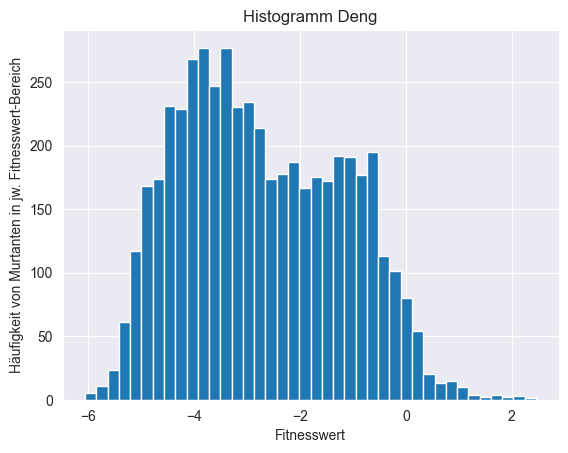

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


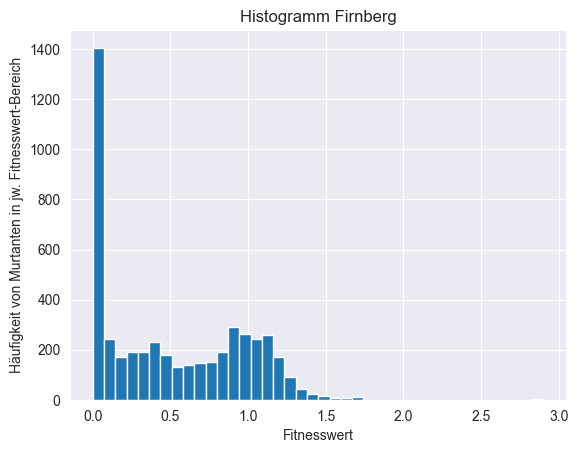

In [11]:
# Extremwerte sollen ausgeschlossen werden, um Außreißereffekten entgegenzuwirken.
# Um zu ermitteln, wie viele Werte an den Extrema ausgeschlossen werden können/sollten werden zunächst die Fitnesswerte der einzelnen Datensätze als Histogrmme dargestellt. Es ergeben sich charakteristische Kurven, deren Form sich durch das Ausschließen der Extremwerte nicht maßgeblich verändern dürfen. Ansonsten hätten wir zu viele Werte ausgeschlossen und in die gemessenen Effekte eingegriffen.

#plotten der Datensätze als Histogramme.
klassen = 40
selected_columns = merged.columns
for column in selected_columns:
    plt.hist(merged[column], bins=klassen)
    plt.xlabel("Fitnesswert")
    plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
    plt.title(f"Histogramm {column}")
    plt.show()

Es ist zu erkennen, dass im Firnberg-Datensatz scheinbar Außreißereffekte vorliegen, da nur etwa die Hälfte der x-Achse des Histogramms mit Säulen besetzt ist.  Es scheint einige wenige Mutanten mit extrem hohen Fitnesswerten zu geben. Da diese sich so klar von der restlichen Population abheben, kann hier von Ausreißern ausgegangen werden. Zudem liegen sehr viele Werte die nur knapp über 0 sind vor. (Biol. Effekt oder falsche Messung???########) Der Deng- und der Stiffler-Datensatz weisen einen angedeuteten exponentiellen Abfall an den Rändern auf. Dass sich die jeweiligen Histogramme etwas weiter als die Säulen erstrecken, deutet darauf hin, dass es wenn überhaupt nur kleine AUsreißereffekte gibt, weshalbt diese Datensätze auf 0,1% und 99,9% Quantli geclippt werden.
 Für den Firnberg-Datensatz wird znächst untersucht, ob es sich bei dem ungewöhnlich hohen Anteil an Werten knapp über 0 um ein Störsignal oder einen biologischen Effekt handelt. Im ANschluss wird untersucht, wie viel % der Werte an den Rändern des Firnberg-Datensatzes abgeschnitten werden sollten, um Ausreißereffete zu minimieren.
Beim Ausschluss von Daten sollte jedoch darauf geachtet werden keine künstlichen Schnittkanten im Histogramm zu erzeugen, da so gemessene Effekte verfälscht werden würden. Idealerweise erstrecken sich die Säulen eines so entstehenden Histogramms über die gesamte x-Achse, wobei keine Schnittkanten im Säulenverlauf erkennbar sein sollten.

In [12]:
merged_log=merged.copy()
for i in range (0, 4996):
       merged_log.iloc[i,2]=np.log(merged_log.iloc[i,2])/np.log(2)

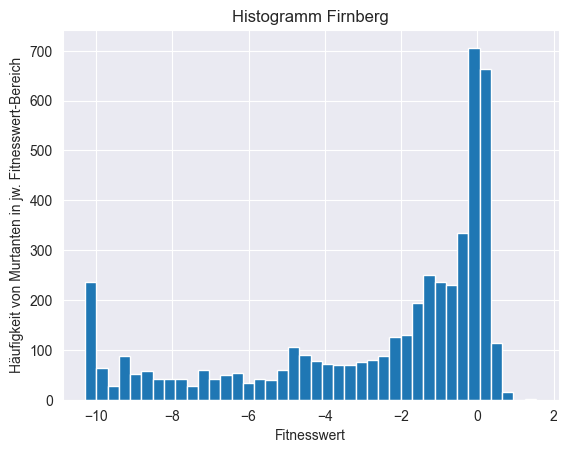

In [13]:
klassen = 40
selected_columns = [merged_log.columns[2]]
for column in selected_columns:
    plt.hist(merged_log[column], bins=klassen)
    plt.xlabel("Fitnesswert")
    plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
    plt.title(f"Histogramm {column}")
    plt.show()

#############
 #testen wie es ist wenn mann 0 abschneidet bei firnberg
merged_cutzero=merged.copy()
for column in merged_cutzero.columns:
        lower_quantile = 0.05
        upper_quantile = merged_cutzero[column].quantile(0.997)
        merged_cutzero.loc[(merged_bla[column] < lower_quantile),column | (merged_cutzero[column] > upper_quantile), column] = np.nan

selected_columns = merged_cutzero.iloc[:,:]
klassen = 40
for column in selected_columns[2]:
        plt.hist(selected_columns[column], bins=klassen)
        plt.xlabel("Fitnesswert")
        plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
        plt.title(f"Histogramm {column} ndern")
        plt.show()

        ###############

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


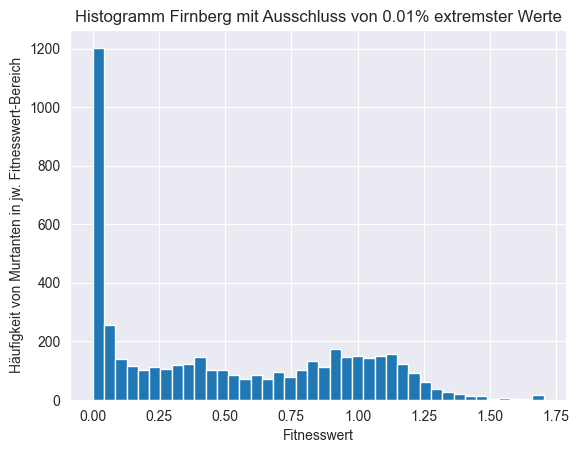

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


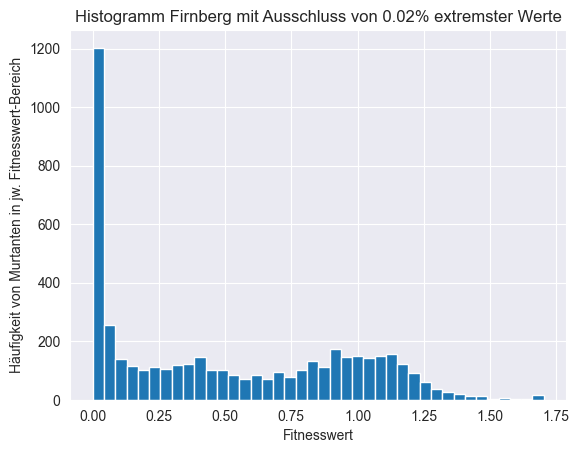

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


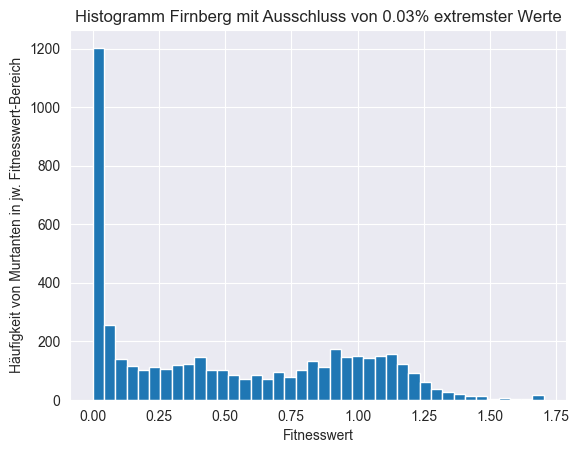

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


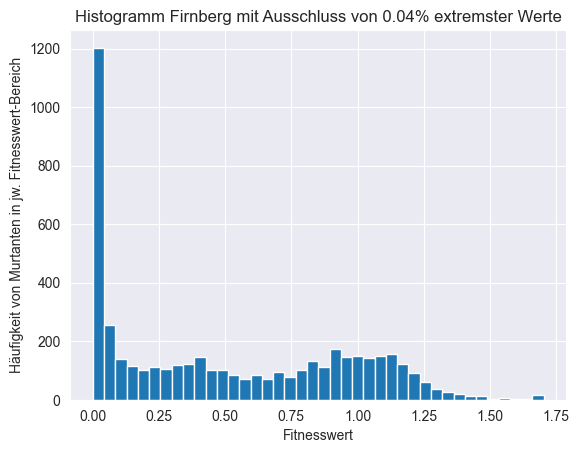

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


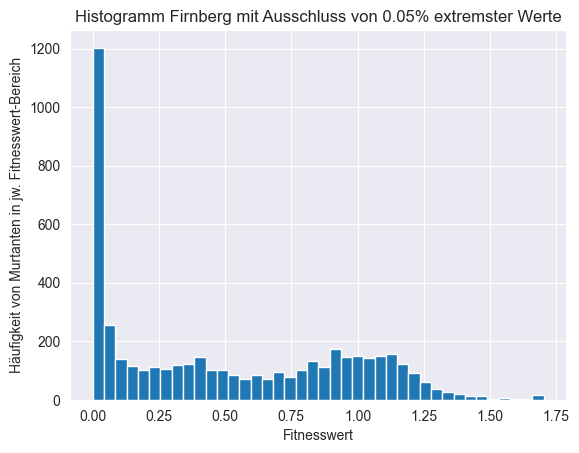

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


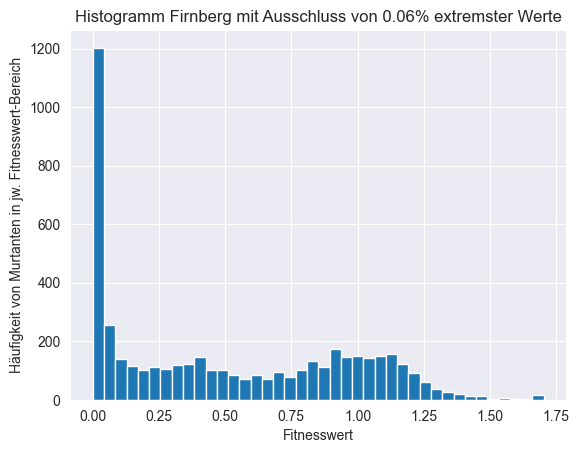

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


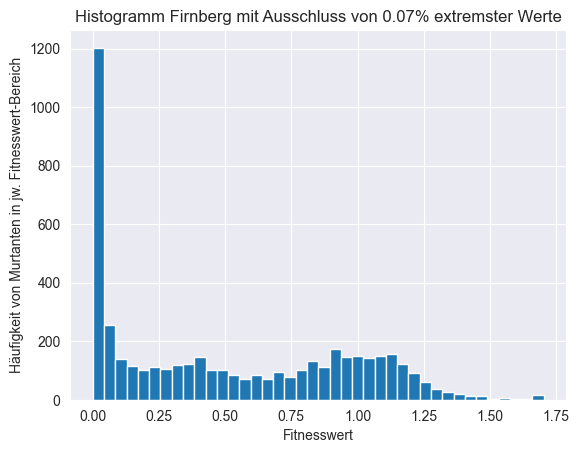

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


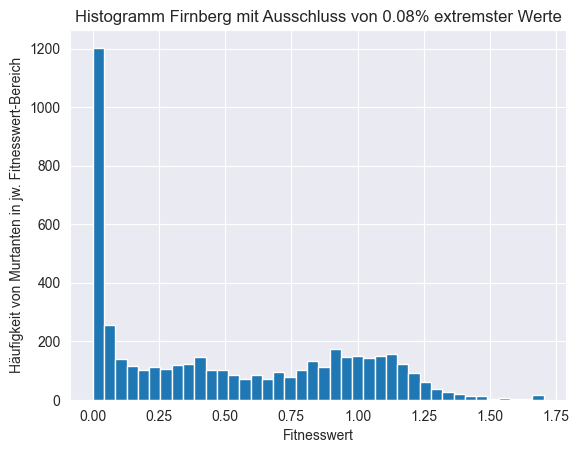

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


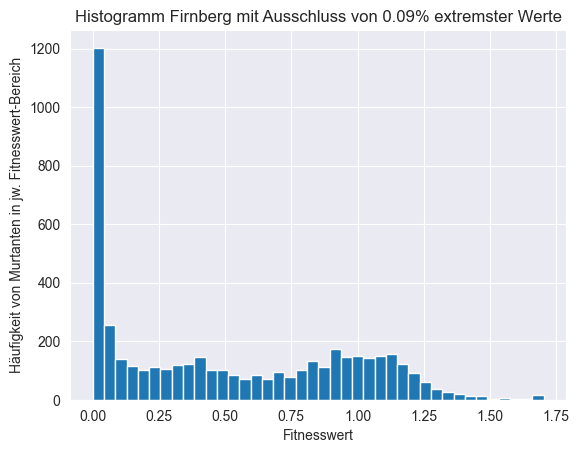

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


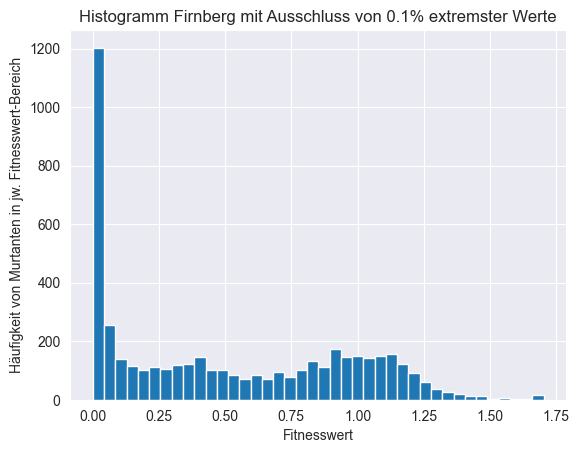

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


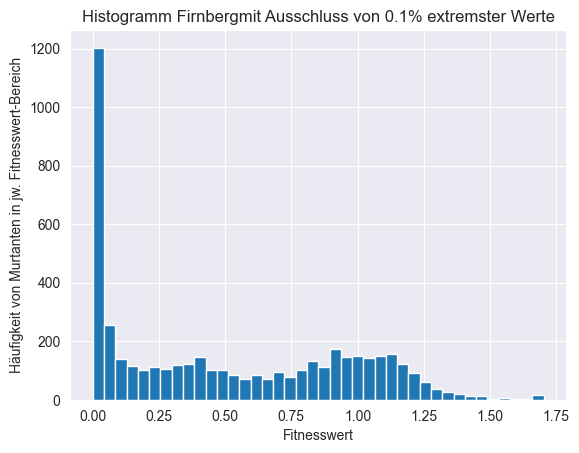

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


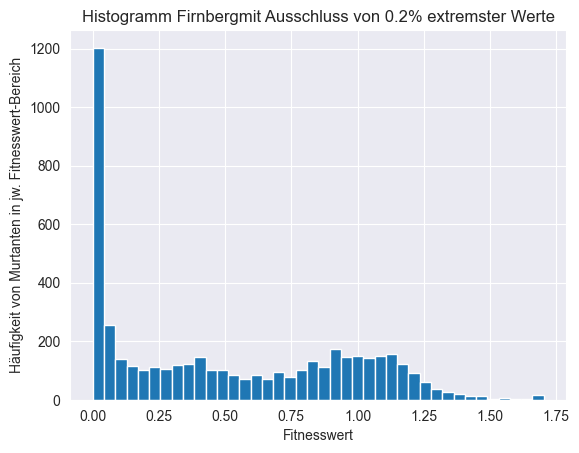

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


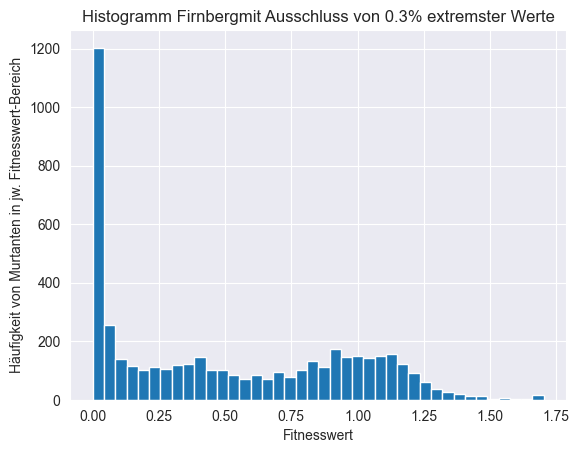

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


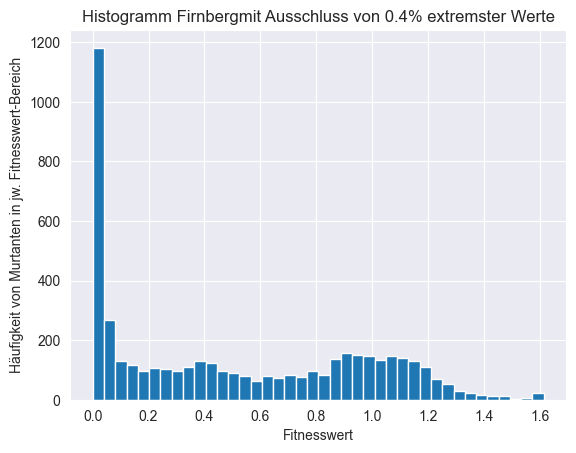

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


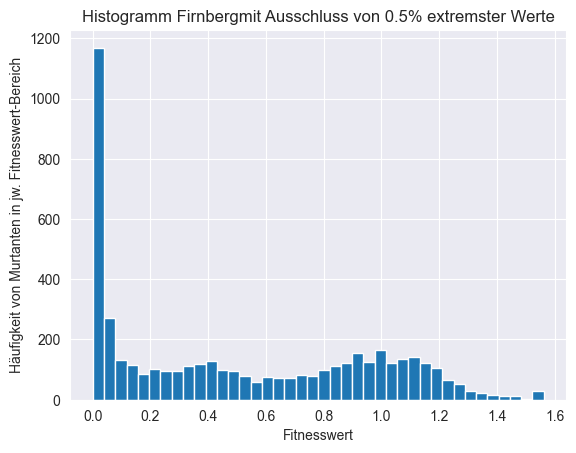

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


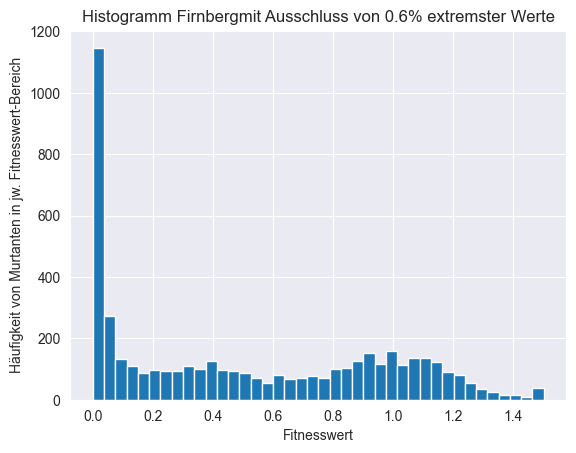

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


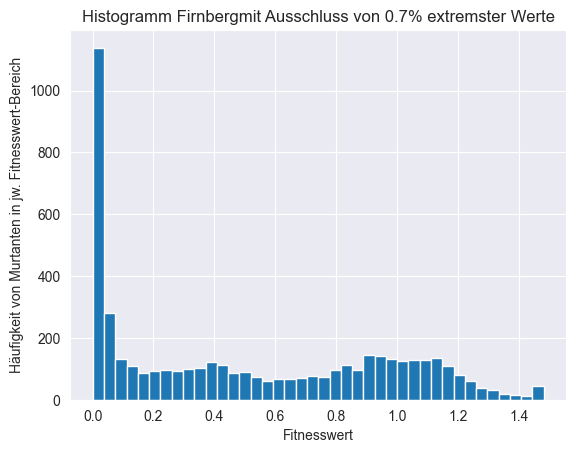

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


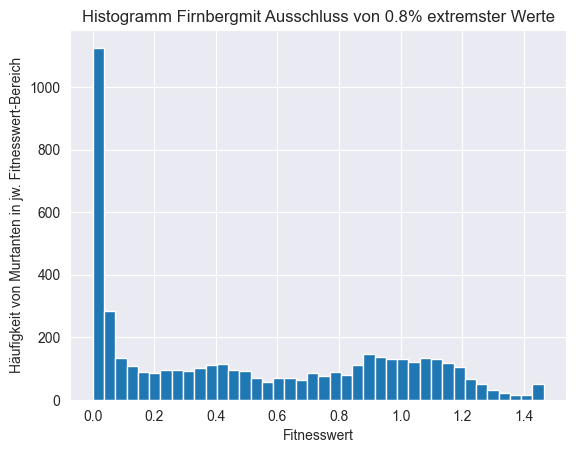

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


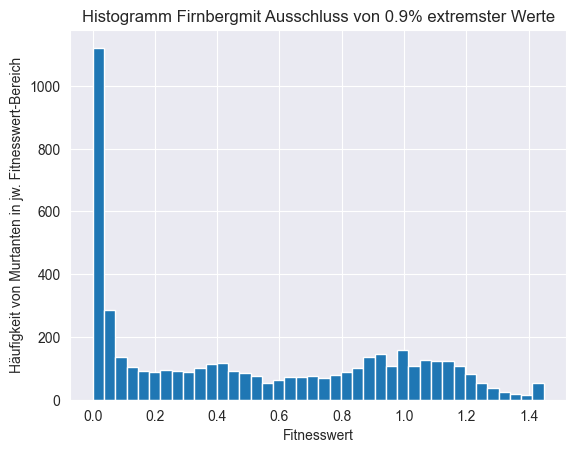

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


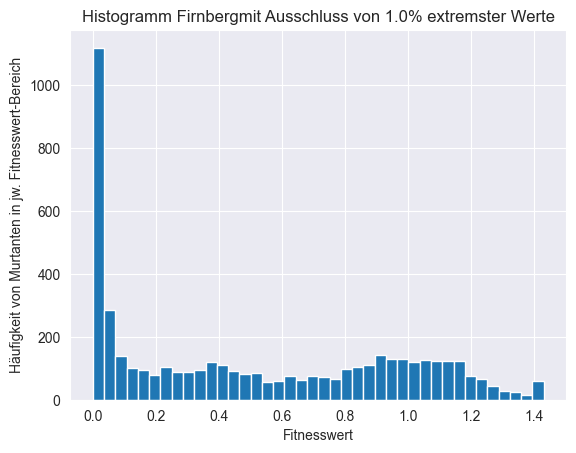

In [45]:
#Extremwerte ausschließen im Firnberg-Datensatz
# Durch jede Spalte iterieren und Werte unter dem 1. Perzentil und über dem 99. Perzentil zu NA setzen
klassen = 40
merged_testcopy=merged.copy()
for i in range (1,11):
    m= (i/100)
    q=m/100
    column = merged_testcopy.columns[2]
    lower_quantile = merged_testcopy[column].quantile(q)
    upper_quantile = merged_testcopy[column].quantile(1-q)
    merged_testcopy.loc[(merged.iloc[:,2] < lower_quantile), column] = lower_quantile
    merged_testcopy.loc[(merged.iloc[:,2] > upper_quantile), column] = upper_quantile


#Histogramme der veränderten Daten plotten, um zu testen, ob sich Population der Mutanten übermäßig veröndert hat.

    selected_columns = [merged_testcopy.columns[2]]
    for column in selected_columns:
        plt.hist(merged_testcopy[column], bins=klassen)
        plt.xlabel("Fitnesswert")
        plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
        plt.title(f"Histogramm {column} mit Ausschluss von {m}% extremster Werte")
        plt.show()

merged_testcopy=merged.copy()
for i in range (1,11):
    m= (i/10)
    q=m/100
    for column in merged_testcopy.columns:
        lower_quantile = merged_testcopy[column].quantile(q)
        upper_quantile = merged_testcopy[column].quantile(1-q)
        merged_testcopy.loc[(merged.iloc[:,2] < lower_quantile), column] = lower_quantile
        merged_testcopy.loc[(merged.iloc[:,2] > upper_quantile), column] = upper_quantile

#Histogramme der veränderten Daten plotten, um zu testen, ob sich Population der Mutanten übermäßig veröndert hat.

    selected_columns = [merged_testcopy.columns[2]]
    for column in selected_columns:
        plt.hist(merged_testcopy[column], bins=klassen)
        plt.xlabel("Fitnesswert")
        plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
        plt.title(f"Histogramm {column}mit Ausschluss von {m}% extremster Werte")
        plt.show()

        ###für Final nur die urspründlichen und die am Ende ausgewählten Histogramme zeigen.

Letztlich verbeliben wir bei ungeclippten Datensätzen, da wir zu dem Schluss gekommen sind, dass wir genau nach den besonders hohen Mutanten suchen. Auch ein mathematisches Umrechnen der Werte wird unterlassen, da für uns nicht genau einsehbar, wie die Daten durch das ProteinGym behandelt wurden. Dass sich die Poupulationen der Mutanten unterschieden geht auf unterschiedliche Fitness-Messmethoden sowie bei öhnlichen Methoden eine dennoch unterschiedene mathematische Berechnung der Fitness-Werte zurück. Dass sich später für die Positionen vergleichbare Effekte für gleiche Messmethoden (Stiffler und Firnberg) ergeben, zeigt, dass die Daten bereits ausreichend aussagekräftig bzw. nutzbar sind.

In [15]:
#clipping der Datensätze
#lower_quantile = merged.iloc[:,0].quantile(0.001)
#upper_quantile = merged.iloc[:,0].quantile(1-0.001)
#merged.loc[(merged.iloc[:,0] < lower_quantile), column] = lower_quantile
#merged.loc[(merged.iloc[:,0] > upper_quantile), column] = upper_quantile

#lower_quantile = merged.iloc[:,1].quantile(0.001)
#upper_quantile = merged.iloc[:,1].quantile(1-0.001)
#merged.loc[(merged.iloc[:,1] < lower_quantile), column] = lower_quantile
#merged.loc[(merged.iloc[:,1] > upper_quantile), column] = upper_quantile
#
#lower_quantile = merged.iloc[:,2].quantile(0.003)
#upper_quantile = merged.iloc[:,2].quantile(1-0.003)
#merged.loc[(merged.iloc[:,2] < lower_quantile), column] = lower_quantile
#merged.loc[(merged.iloc[:,2] > upper_quantile), column] = upper_quantile
#noch die jw. quantiles einfügen (evtl. noch differenzieren zwischen oberer und unterer)

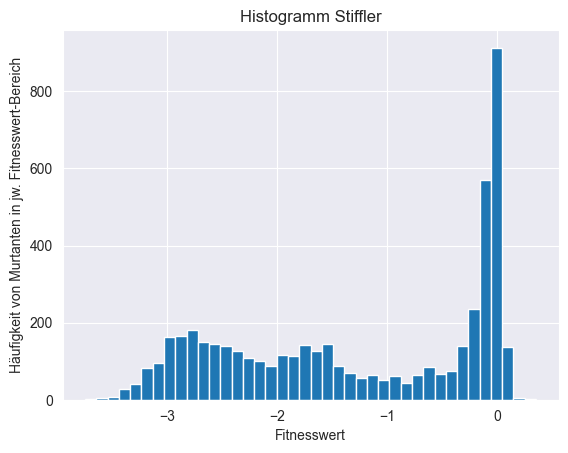

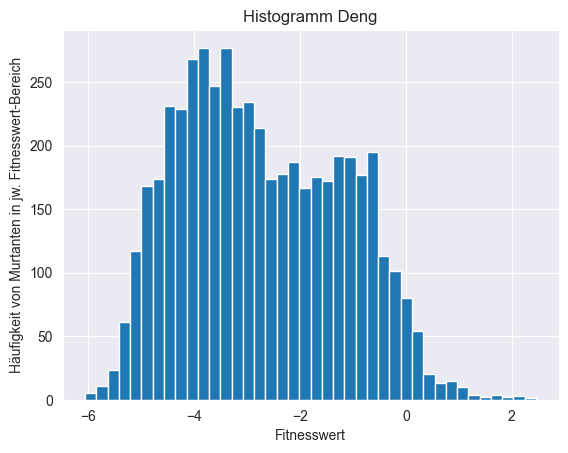

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


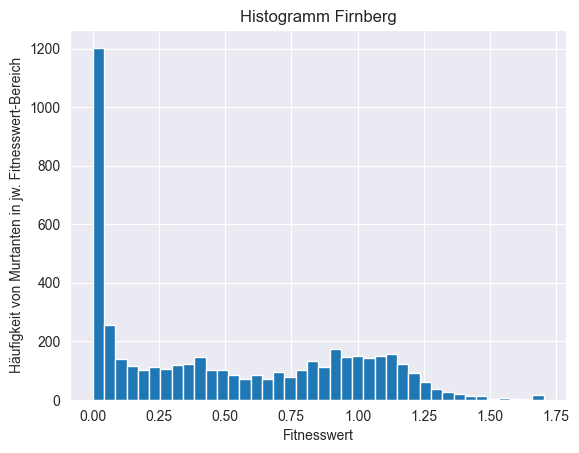

In [16]:
#plotten der geclippten Datensätze.
#klassen = 40
#selected_columns = merged.columns
#for column in selected_columns:
 #   plt.hist(merged[column], bins=klassen)
  #  plt.xlabel("Fitnesswert")
   # plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
    #plt.title(f"Histogramm {column}")
    #plt.show()

Es sollen Heatmaps für alle Mutanten an den verschiedenen Positionen für jeden Datensatz erstellt werden. So sollen besonders fragile Positionen visuell ermittelt werden. Positionen für die viele bzw. alle Muantenbedeutend bnegative Fitnesseffete aufweisen sind als fragil anzusehen. Positionen, bei denen bemerkenswert viele bzw. alle Mutanten neutrale oder sogar positive Fitnesseffekte aufweisen sind als robust anzusehen.

In [17]:
#DataFrames für Heatmaps der Mutanten erstellen.

merged_copy=merged.copy()
# Extrahiere die Zahl aus dem Index
merged_copy['Number'] = merged_copy.index.get_level_values(0).str[1:-1].astype(int)

# Extrahiere den letzten Buchstaben aus dem Index
merged_copy['LastLetter'] = merged_copy.index.get_level_values(0).str[-1]

# Erstelle separate DataFrames für jede Spalte
stiffler_df = merged_copy.pivot(index='Number', columns='LastLetter', values='Stiffler')
deng_df = merged_copy.pivot(index='Number', columns='LastLetter', values='Deng')
firnberg_df = merged_copy.pivot(index='Number', columns='LastLetter', values='Firnberg')

# Zeige die DataFrames an
print("Stiffler DataFrame:")
print(stiffler_df)
print("\nDeng DataFrame:")
print(deng_df)
print("\nFirnberg DataFrame:")
print(firnberg_df)

stiffler_df = stiffler_df.astype(float)
deng_df = deng_df.astype(float)
firnberg_df = firnberg_df.astype(float)

Stiffler DataFrame:
LastLetter         A         C         D         E         F         G  \
Number                                                                   
24               NaN  -0.41826 -0.181607 -0.279024 -0.818487 -0.060242   
25         -1.642595 -0.364138 -0.028403  0.143258 -0.199804 -0.969268   
26          0.010913 -0.158233 -0.075785       NaN -0.232106   0.08131   
27         -1.454588 -2.419023 -2.294883 -2.414464  -2.60457 -2.356712   
28         -0.202228 -1.959591 -2.710769 -1.721638 -0.720047 -1.484204   
...              ...       ...       ...       ...       ...       ...   
282        -0.103001 -0.617685 -2.529508 -2.954318 -0.663794  -2.41565   
283        -0.537631 -0.657012 -2.788857 -2.601698 -0.123746 -2.247811   
284        -0.038962  -0.91867 -0.061476 -0.027481 -0.286851 -0.092462   
285        -0.465274 -0.251095 -1.535461 -0.338762 -0.149276 -0.509937   
286        -3.178798 -2.983762 -2.859106 -2.545852 -0.780425 -3.228429   

LastLetter       

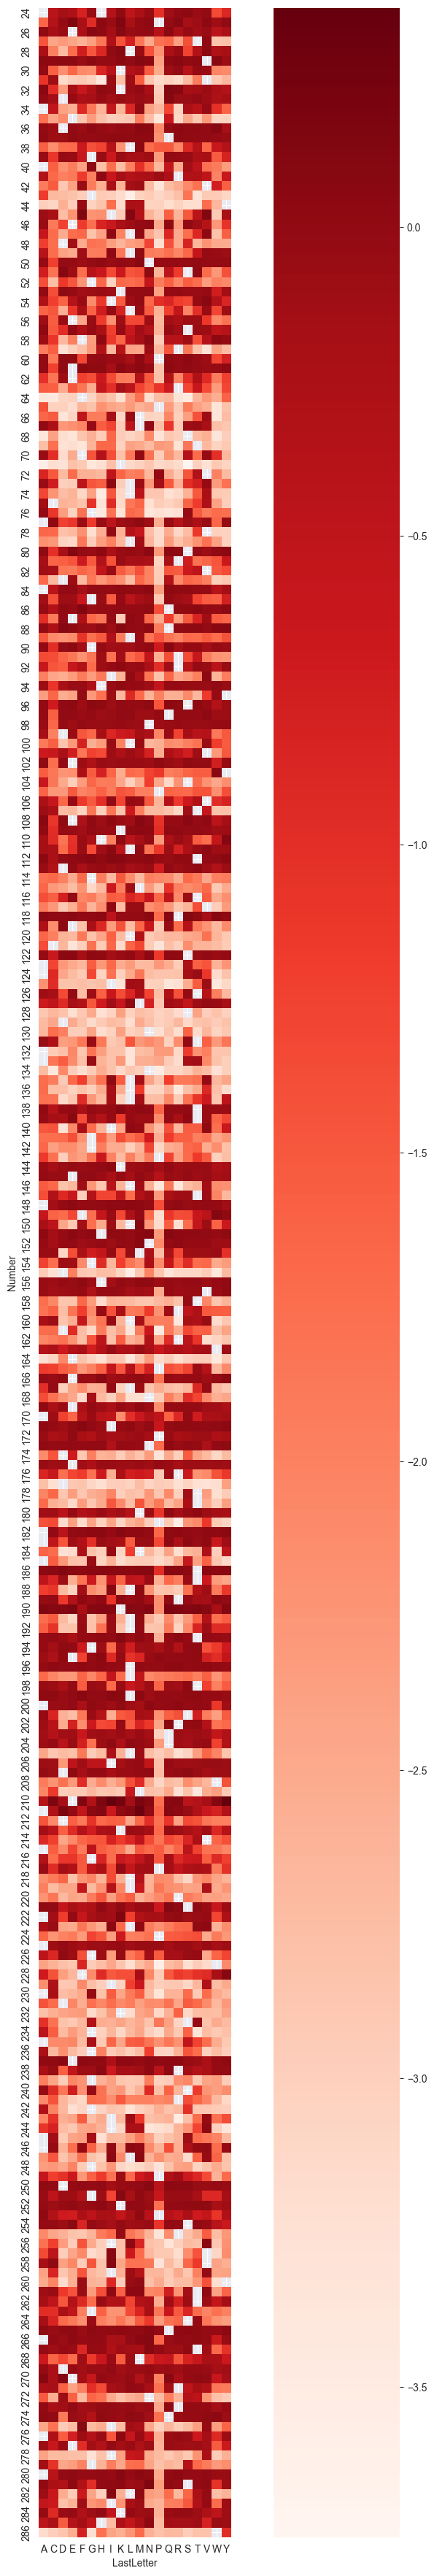

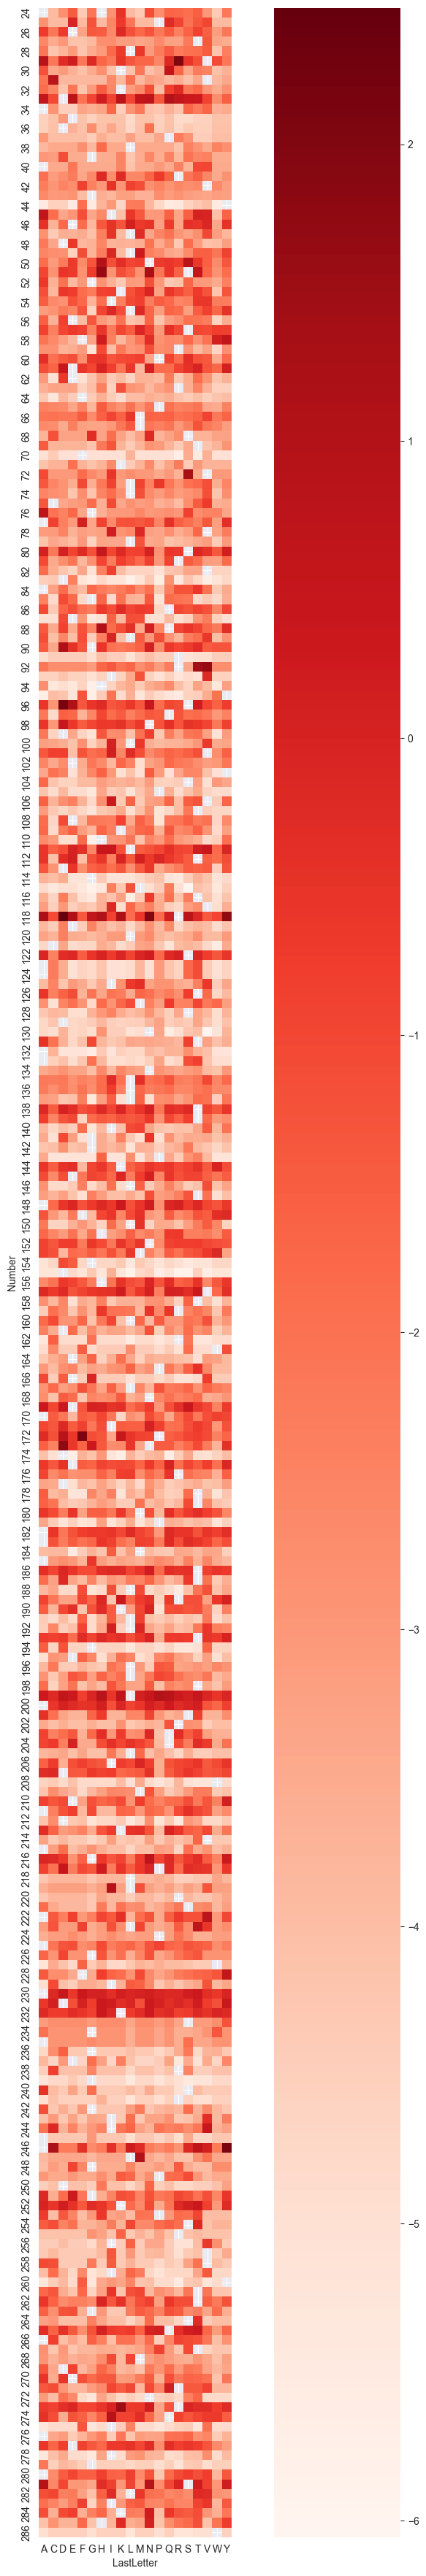

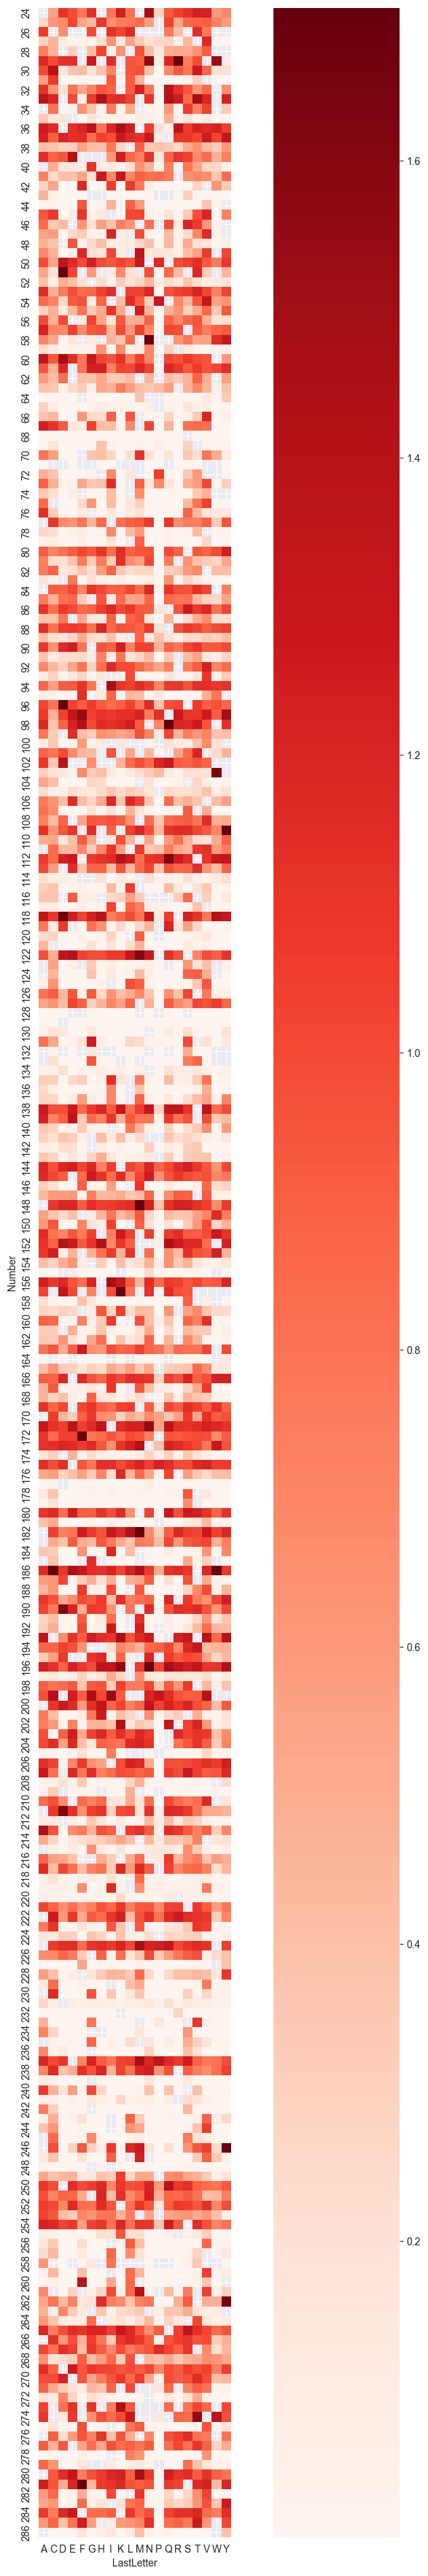

In [18]:
#Heatmaps plotten. (###noch verschönern)

import seaborn as sns
import matplotlib.pyplot as plt


# Heatmap für Stiffler DataFrame
plt.figure(figsize=(15, 45))
sns.heatmap(stiffler_df, cmap='Reds' ,square=True)
plt.show()
plt.close()

# Heatmap für Deng DataFrame
plt.figure(figsize=(15, 45))
sns.heatmap(deng_df, annot=False, cmap='Reds',   square=True)
plt.savefig('deng_heatmap.png')
plt.show()

plt.close()

# Heatmap für Firnberg DataFrame
plt.figure(figsize=(15, 45))
sns.heatmap(firnberg_df, annot=False, cmap='Reds', square=True)
plt.savefig('firnberg_heatmap.png')
plt.show()

plt.close()


Normalisierung. Es werdne im FOlgenden N-Normalisierung und Z-Normalisierung der Daten verglichen. Es wird insbesondere erwartet, dass der Firnberg- und der Stiffler-Datensatz ähnliche Ergebnisse/Werte bei adäquater Normalisierung aufweisen werden, da deren Werte nach ähnlichen Methoden erhoben wurden.

In [19]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()

In [20]:
#Funktion für N-Normalisierung
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


       Stiffler      Deng  Firnberg
H24C   0.811164  0.250327  0.331238
H24Y   0.697293  0.456368  0.413959
H24W   0.584448  0.200915  0.353269
H24V   0.906646  0.357546  0.717702
H24T   0.896811  0.527393   0.72152
...         ...       ...       ...
W286G  0.125601  0.128355   0.00282
W286F  0.722811  0.177767   0.10111
W286E  0.292121  0.177767  0.009576
W286C   0.18529  0.177767   0.00094
W286A  0.137709  0.128355       NaN

[4996 rows x 3 columns]


In [21]:
#Funktion für Z-Normalisierung
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])

    gauss[x] = [mu, sigma]
min_max_filter(mergedc_n)
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
z_filter(mergedc_z)

Stiffler      Deng  Firnberg
H24C   0.727139 -0.788864   0.12324
H24Y   0.321797  0.359935  0.436676
H24W  -0.079893 -1.064359  0.206719
H24V   1.067021 -0.191058  1.587576
H24T   1.032012  0.755934  1.602045
...         ...       ...       ...
W286G -1.713229 -1.468922 -1.121156
W286F  0.412633 -1.193425 -0.748728
W286E -1.120475 -1.193425 -1.095556
W286C -1.500758 -1.193425  -1.12828
W286A -1.670129 -1.468922       NaN

[4996 rows x 3 columns]

In [22]:
#Mittelwert und Varianz (aus drei Datensätzen) für jede Mutante an die DataFrames hängen
def mean_var_merge(data : pd.DataFrame):

    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data

mergedc_n_mv = mergedc_n.copy()
mergedc_z_mv = mergedc_z.copy()
mean_var_merge(mergedc_n_mv)
mean_var_merge(mergedc_z_mv)

Stiffler      Deng  Firnberg      mean       var
H24C   0.727139 -0.788864   0.12324  0.020505  0.388321
H24Y   0.321797  0.359935  0.436676  0.372803  0.002282
H24W  -0.079893 -1.064359  0.206719 -0.312511  0.296329
H24V   1.067021 -0.191058  1.587576   0.82118  0.557475
H24T   1.032012  0.755934  1.602045  1.129997  0.124118
...         ...       ...       ...       ...       ...
W286G -1.713229 -1.468922 -1.121156 -1.434436   0.05902
W286F  0.412633 -1.193425 -0.748728  -0.50984  0.458437
W286E -1.120475 -1.193425 -1.095556 -1.136485  0.001725
W286C -1.500758 -1.193425  -1.12828 -1.274154  0.026382
W286A -1.670129 -1.468922       NaN -1.569525  0.010121

[4996 rows x 5 columns]

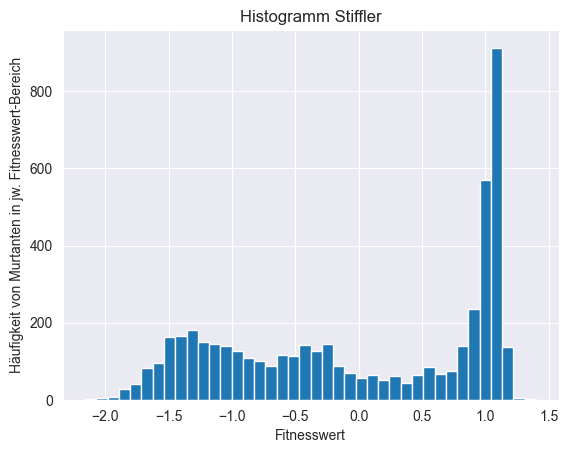

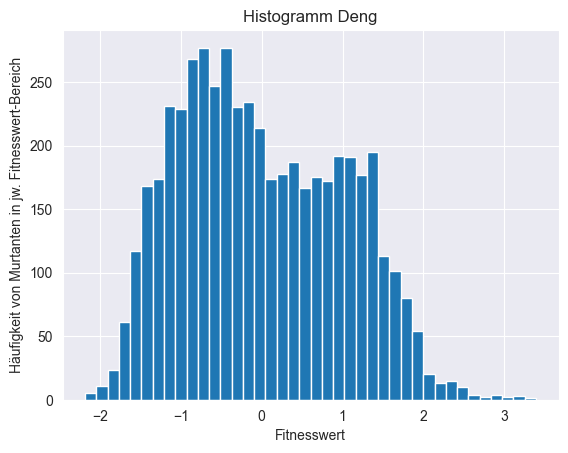

C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\malte\PycharmProjects\topic02_team01\venv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


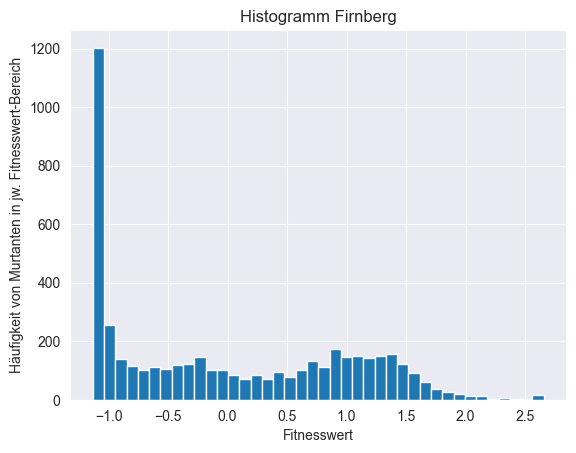

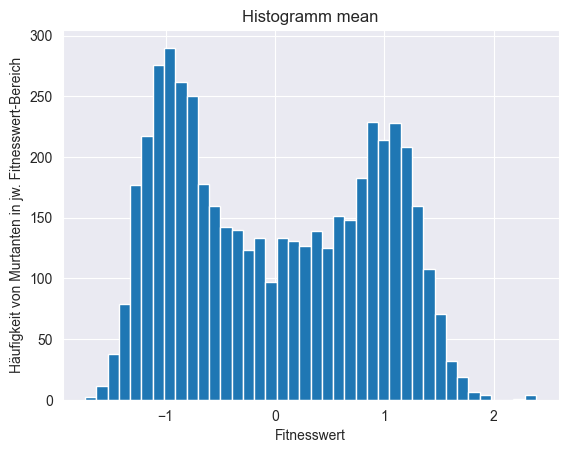

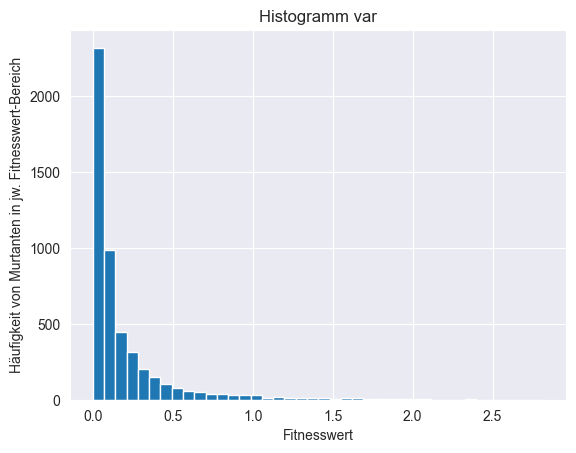

In [23]:
#normalisierte Daten plotten im Histogramm (###evtl rausnehmen)
selected_columns = mergedc_z_mv.iloc[:,:]
klassen = 40
for column in selected_columns:
    plt.hist(selected_columns[column], bins=klassen)
    plt.xlabel("Fitnesswert")
    plt.ylabel("Häufigkeit von Murtanten in jw. Fitnesswert-Bereich")
    plt.title(f"Histogramm {column}")
    plt.show()

Positionseffekte: Positionsmittelwerte aus FItnesswerten der Mutanten berechnen.

In [24]:
#An DataFrames Position-column anhöngen (zunöchst leer)
mergedc_n_mv["Position"] = np.nan
mergedc_z_mv["Position"] = np.nan

#Position für jede Mutante zuweisen
for i in range(0,len(mergedc_n_mv)):
    indices = [1,-1]
    s=mergedc_n_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_n_mv["Position"][i]=int(part)
mergedc_n_mv["Position"]=mergedc_n_mv["Position"].astype(int)

for i in range(0,len(mergedc_z_mv)):
    indices = [1,-1]
    s=mergedc_z_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_z_mv["Position"][i]=int(part)
mergedc_z_mv["Position"] = mergedc_z_mv["Position"].astype(int)

C:\Users\malte\AppData\Local\Temp\ipykernel_17200\2347321110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\malte\AppData\Local\Temp\ipykernel_17200\2347321110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\malte\AppData\Local\Temp\ipykernel_17200\2347321110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Positio

In [25]:
#Position_means DataFrame aufbauen
columns = ['mean_Stiffler_n','var_Stiffler_n','mean_Deng_n','var_Deng_n','mean_Firnberg_n','var_Firnberg_n','mean_all_n','var_all_n','mean_Stiffler_z','var_Stiffler_z','mean_Deng_z','var_Deng_z','mean_Firnberg_z','var_Firnberg_z','mean_all_z','var_all_z']
index = range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1)
##warum muss ich hier nochmal Int() nutzen? Ich habe im Chunk darüber doch int(part) verwendet...(Positionswerte wurden scheinbar als floats gespeichert)?

position_means= pd.DataFrame( columns = columns, index = index)
position_means.index.name="Position"

In [26]:
#DataFrame füllen: Mittelwerten und Varianzen für Position aus allen Mutanten aus allen Datensätzen)
for i in range(mergedc_n_mv["Position"][0], mergedc_n_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_n_mv["Position"]==i)[0][0], np.where(mergedc_n_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_n_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_n"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_n"]=np.nanvar(Pos)

for i in range(mergedc_z_mv["Position"][0], mergedc_z_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_z_mv["Position"]==i)[0][0], np.where(mergedc_z_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_z_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_z"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_z"]=np.nanvar(Pos)

In [27]:
#DataFrame füllen: Mittelwerte und Varianzen für Positionen aus einzelnen Datensätzen getrennt

grouped_n=mergedc_n_mv.groupby("Position")
grouped_z=mergedc_z_mv.groupby("Position")
#(NaNs are excluded by default)

position_means["mean_Stiffler_n"]= grouped_n.mean()["Stiffler"]
position_means["mean_Deng_n"]= grouped_n.mean()["Deng"]
position_means["mean_Firnberg_n"]= grouped_n.mean()["Firnberg"]
position_means["mean_Stiffler_z"]= grouped_z.mean()["Stiffler"]
position_means["mean_Deng_z"]= grouped_z.mean()["Deng"]
position_means["mean_Firnberg_z"]= grouped_z.mean()["Firnberg"]

position_means["var_Stiffler_n"]= grouped_n.var()["Stiffler"]
position_means["var_Deng_n"]= grouped_n.var()["Deng"]
position_means["var_Firnberg_n"]= grouped_n.var()["Firnberg"]
position_means["var_Stiffler_z"]= grouped_z.var()["Stiffler"]
position_means["var_Deng_z"]= grouped_z.var()["Deng"]
position_means["var_Firnberg_z"]= grouped_z.var()["Firnberg"]

position_means

mean_Stiffler_n var_Stiffler_n mean_Deng_n var_Deng_n  \
Position                                                         
24              0.827952       0.009871     0.40783   0.019859   
25              0.868782       0.010995    0.424186   0.029516   
26              0.887442       0.001312    0.512003   0.009361   
27              0.463575       0.039616    0.345967   0.005709   
28              0.712919       0.045084    0.415597   0.017025   
...                  ...            ...         ...        ...   
282             0.511994       0.082602    0.474935   0.018866   
283             0.577036       0.064666    0.448505   0.013882   
284             0.838571       0.021394    0.467188   0.020676   
285             0.768163       0.040906    0.400825   0.026953   
286             0.314421       0.027956    0.152398   0.001021   

         mean_Firnberg_n var_Firnberg_n mean_all_n var_all_n mean_Stiffler_z  \
Position                                                                       
24              0.553783       0.031532   0.597328  0.049923        0.786898   
25              0.428959       0.016143   0.573975   0.06135        0.932237   
26              0.537912       0.021452   0.666012   0.04024        0.998662   
27                0.1633       0.028752   0.324281  0.038655       -0.510157   
28               0.32275       0.026801   0.495907  0.055854        0.377421   
...                  ...            ...        ...       ...             ...   
282             0.199509       0.057447   0.395479  0.069615       -0.337803   
283             0.258699       0.048967    0.42808  0.057366       -0.106276   
284             0.555908       0.027365    0.62171  0.047279        0.824699   
285             0.427028       0.041145    0.53388  0.062602         0.57407   
286             0.047376       0.005487   0.173613  0.022982       -1.041095   

         var_Stiffler_z mean_Deng_z var_Deng_z mean_Firnberg_z var_Firnberg_z  \
Position                                                                        
24             0.125082    0.089304   0.617338        0.966478       0.452704   
25             0.139314    0.180497   0.917549        0.493512       0.231765   
26              0.01663    0.670128   0.291014        0.906341       0.307987   
27              0.50198   -0.255614   0.177461       -0.513088       0.412785   
28             0.571262    0.132612   0.529266         0.09108       0.384784   
...                 ...         ...        ...             ...            ...   
282            1.046659    0.463454    0.58649       -0.375889       0.824761   
283            0.819396     0.31609   0.431554       -0.151614       0.703014   
284            0.271089    0.420258   0.642744        0.974529       0.392879   
285            0.518326    0.050248   0.837884        0.486195       0.590717   
286            0.354228   -1.334869   0.031742        -0.95233       0.078778   

         mean_all_z var_all_z  
Position                       
24          0.60758  0.518262  
25         0.535416  0.501999  
26         0.849384   0.19533  
27        -0.426286   0.35948  
28          0.20862  0.491601  
...             ...       ...  
282       -0.083413  0.925956  
283          0.0194  0.661396  
284        0.735638  0.467781  
285        0.368099  0.668404  
286       -1.112237   0.17473  

[263 rows x 16 columns]

ANhand der Positionseffekte (Fitnessmittelwerte für jw. Positionen) aus den verschiedenen Datensätzen wird geprüft, welche der Normierungsmethoden adäquat ist. Zur Erinnerung: Insbesondere Firnberg und Stiffler sollten öhnliche Ergennisse liefern.

<Axes: ylabel='Position'>

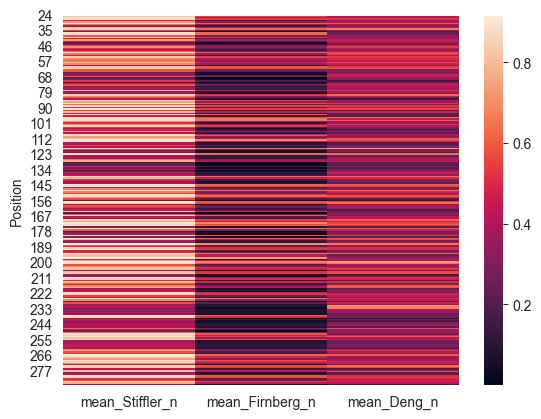

In [28]:
#Visuelle Analyse per Heatmap:

# Heatmap N-Normierung
spalten_n = [0, 4, 2]
position_means_rearranged = position_means.iloc[:, spalten_n]
data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)

<Axes: ylabel='Position'>

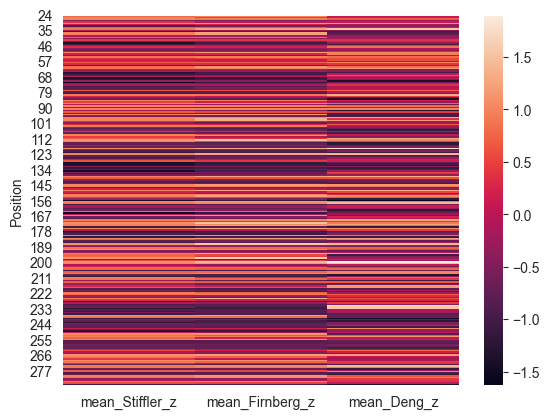

In [29]:

# Heatmap Z-Normierung
spalten_z = [8, 12, 10]
position_means_rearranged = position_means.iloc[:, spalten_z]
data_heatmap = position_means_rearranged.astype(float)
sns.heatmap(data_heatmap)


Es wird deutlich, dass die Stiffler- und Firnberg-Werte bei der Z-Normierung nah beieinander leigen. Für die N-Normierung ergibt sich für die beiden Datensätze zwar ein ähnliches Muster, jedoch scheinen die Firnberg-Werte durchweg geringer zu sein, als die Stiffler-Werte. Somit wird die Z-Normierung als Normierungsmethode für die Datensätze gewählt und mit den auf diese Weise normierten Daten im Folgenden weiter gearbeitet. Ferner wird deutlich, dass die Deng-Werte wie erwartet stärker von den Stiffler- bzw. Firnberg-Daten abweichen als jene untereinander.


In [30]:
#N-Normierung droppen
position_means_Z=position_means.iloc[:,8:]
position_means_Z

mean_Stiffler_z var_Stiffler_z mean_Deng_z var_Deng_z  \
Position                                                         
24              0.786898       0.125082    0.089304   0.617338   
25              0.932237       0.139314    0.180497   0.917549   
26              0.998662        0.01663    0.670128   0.291014   
27             -0.510157        0.50198   -0.255614   0.177461   
28              0.377421       0.571262    0.132612   0.529266   
...                  ...            ...         ...        ...   
282            -0.337803       1.046659    0.463454    0.58649   
283            -0.106276       0.819396     0.31609   0.431554   
284             0.824699       0.271089    0.420258   0.642744   
285              0.57407       0.518326    0.050248   0.837884   
286            -1.041095       0.354228   -1.334869   0.031742   

         mean_Firnberg_z var_Firnberg_z mean_all_z var_all_z  
Position                                                      
24              0.966478       0.452704    0.60758  0.518262  
25              0.493512       0.231765   0.535416  0.501999  
26              0.906341       0.307987   0.849384   0.19533  
27             -0.513088       0.412785  -0.426286   0.35948  
28               0.09108       0.384784    0.20862  0.491601  
...                  ...            ...        ...       ...  
282            -0.375889       0.824761  -0.083413  0.925956  
283            -0.151614       0.703014     0.0194  0.661396  
284             0.974529       0.392879   0.735638  0.467781  
285             0.486195       0.590717   0.368099  0.668404  
286             -0.95233       0.078778  -1.112237   0.17473  

[263 rows x 8 columns]

In [31]:
#Überprüfen ob visuelle ANalyse korrekt: WIlcoxon SIgned Rank Test (Wahrscheinlichkeit, dass Werte "aus selber Population kommen" wird ermittelt. Diese sollte hoch sein, da das gleiche Enzym getestet wird und nur die Testmethoden unterschiedlich waren. Daher ist ein hoher p-Wert ein INdikator für eine gute Normierungsmethode, die die Daten vergleichbar miteinander machen soll. Gewisse Abweichungen von nahezu 100% p-Wert lassen sich mit Unterschieden in den Testmethoden begrpnden.
from scipy.stats import wilcoxon
samples = position_means_Z.columns[[0,2,4]]
  # Alle Spalten außer der Positionsspalte
for i in range(len(samples)):
        for j in range(i+1, len(samples)): #-1 damit nicht mean_all auch getestet wird
            sample1 = position_means_Z[samples[i]]
            sample2 = position_means_Z[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



Wilcoxon-Signed-Rank-Test: mean_Stiffler_z vs mean_Deng_z
Statistik: 16886.0, p-Wert: 0.7022661588619417
Wilcoxon-Signed-Rank-Test: mean_Stiffler_z vs mean_Firnberg_z
Statistik: 17271.0, p-Wert: 0.9438279126097416
Wilcoxon-Signed-Rank-Test: mean_Deng_z vs mean_Firnberg_z
Statistik: 16468.0, p-Wert: 0.47103696264795236


In [32]:
position_means_N=position_means.iloc[:,:8]
position_means_N

#mal zum testen, wie sehr die DS "korrelieren"
from scipy.stats import wilcoxon
samples = position_means_N.columns[[0,2,4]]
  # Alle Spalten außer der Positionsspalte
for i in range(len(samples)):
        for j in range(i+1, len(samples)):
            sample1 = position_means_N[samples[i]]
            sample2 = position_means_N[samples[j]]

            stat, p_value = wilcoxon(sample1, sample2, alternative='two-sided')
            print(f"Wilcoxon-Signed-Rank-Test: {samples[i]} vs {samples[j]}")
            print(f"Statistik: {stat}, p-Wert: {p_value}")



Wilcoxon-Signed-Rank-Test: mean_Stiffler_n vs mean_Deng_n
Statistik: 1459.0, p-Wert: 6.121870918002413e-38
Wilcoxon-Signed-Rank-Test: mean_Stiffler_n vs mean_Firnberg_n
Statistik: 0.0, p-Wert: 6.890971898770476e-45
Wilcoxon-Signed-Rank-Test: mean_Deng_n vs mean_Firnberg_n
Statistik: 6388.0, p-Wert: 6.427849505276682e-19


Der Wilcoxon Signed Rank Test zeigt, dass die N-Normierung die Werte nicht vergleichbar macht. Die Z-Normierung dagegen produziert hohe p-Werte, macht die Werte aus den verschiedenen Datensätzen somit gut vergleichbar.

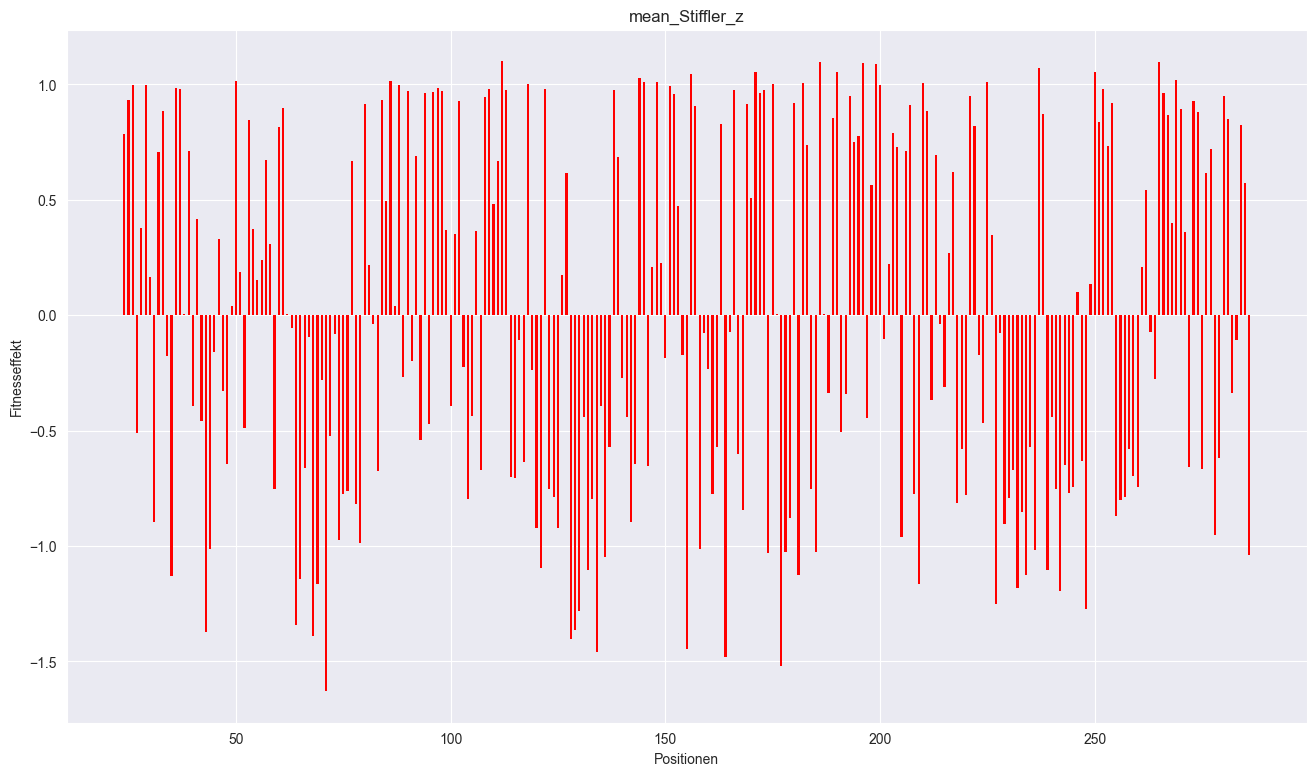

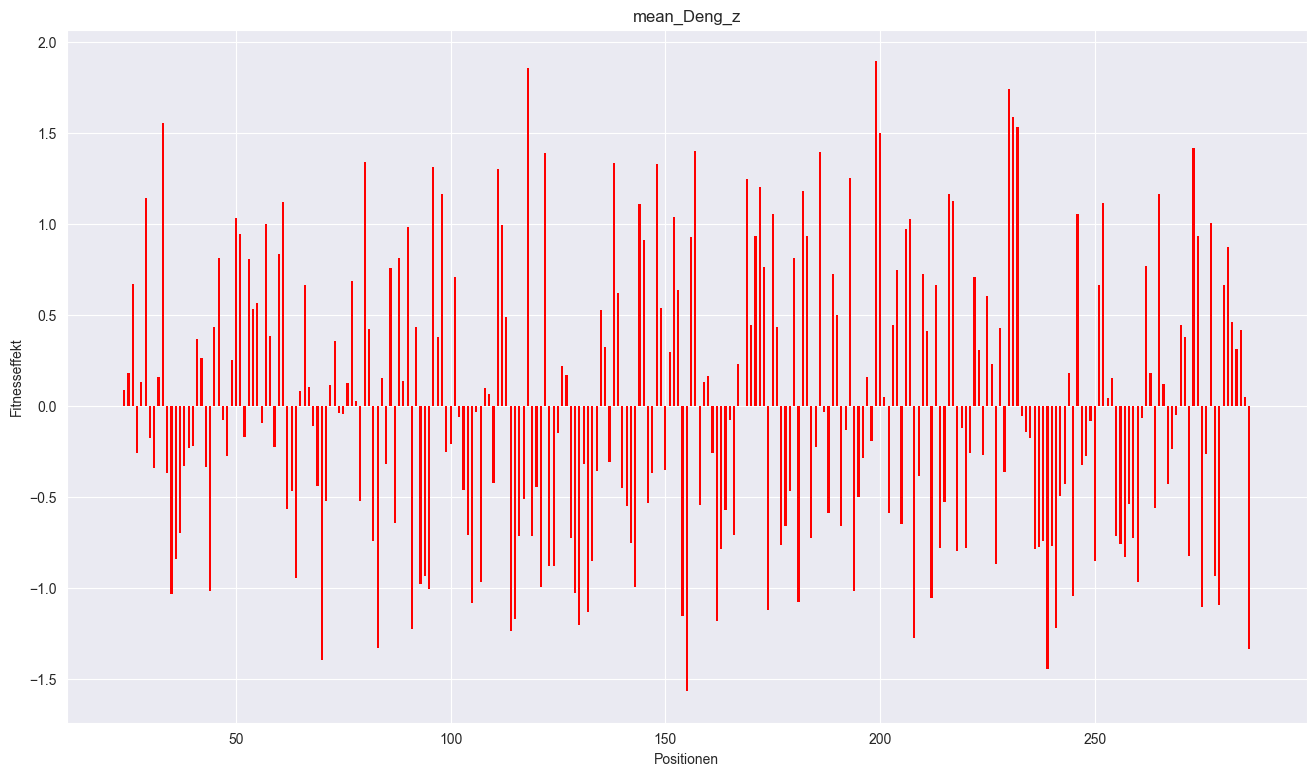

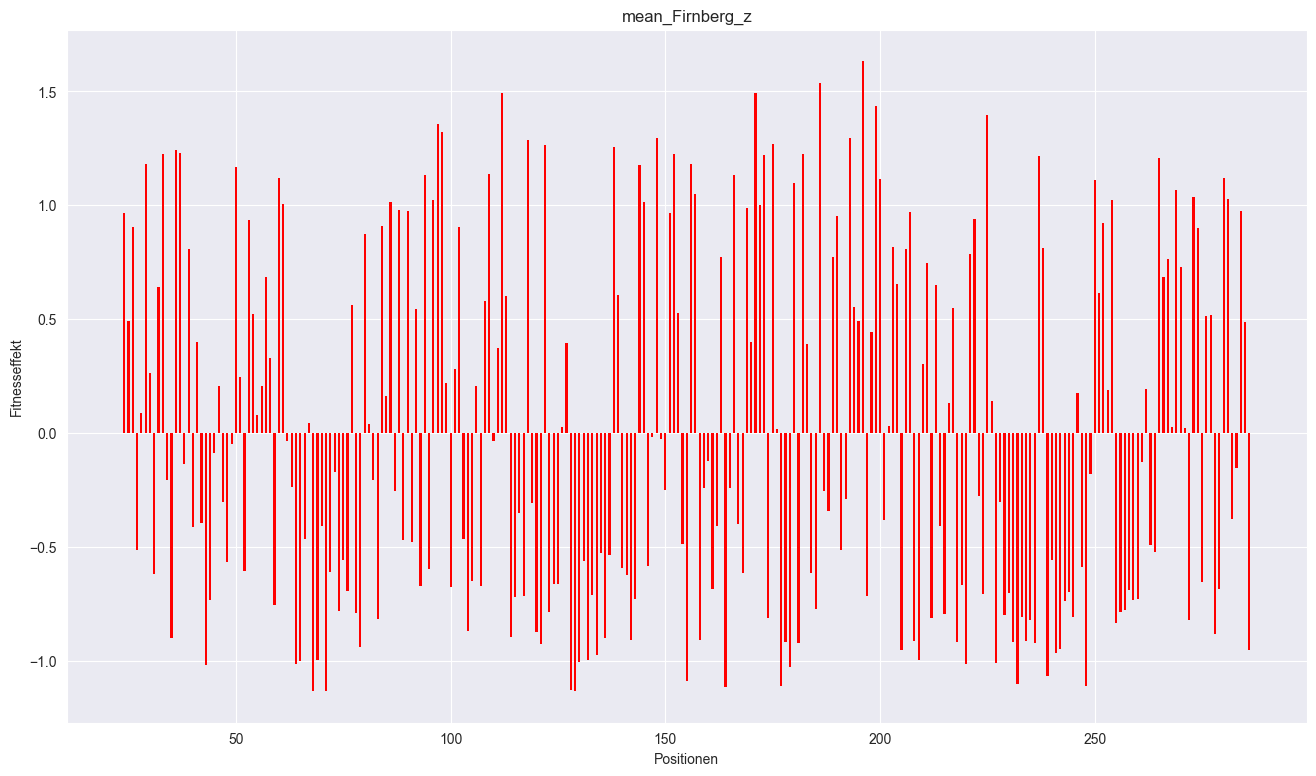

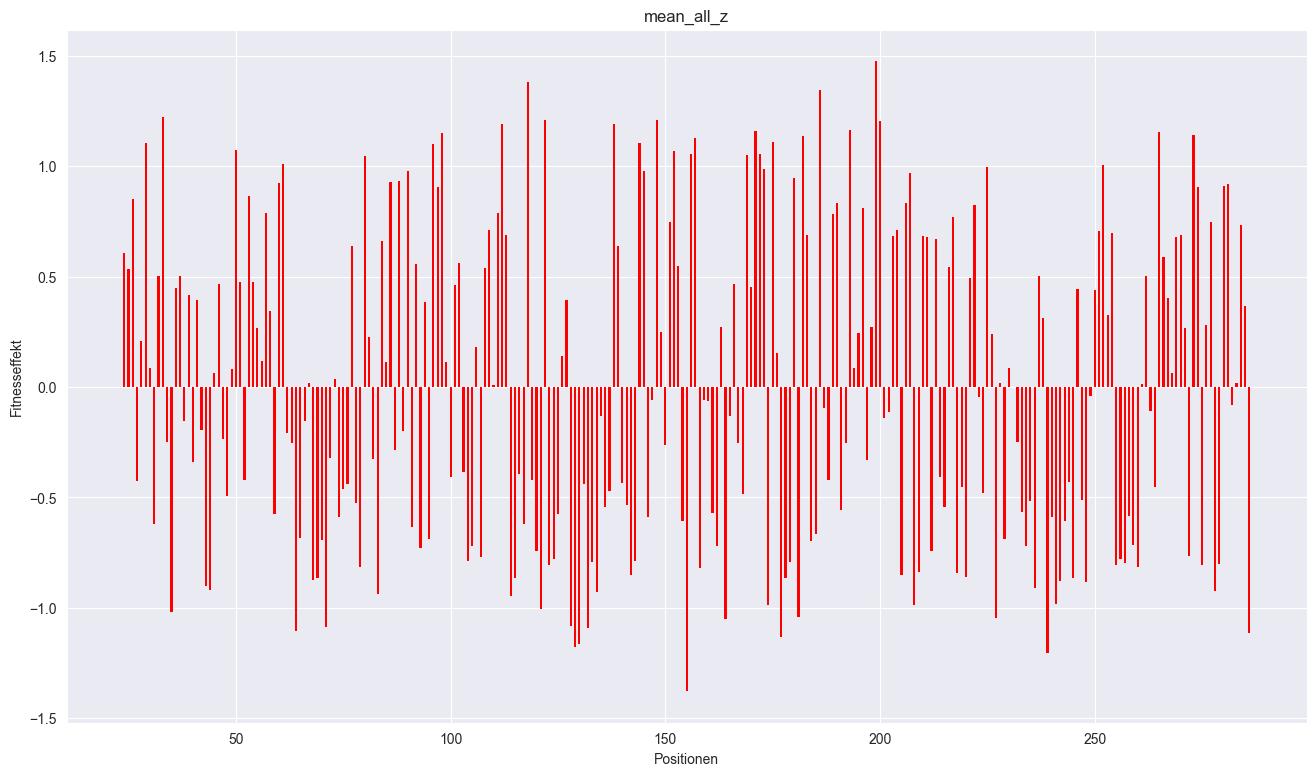

In [33]:
#Plotten der Positionseffekte.
for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()

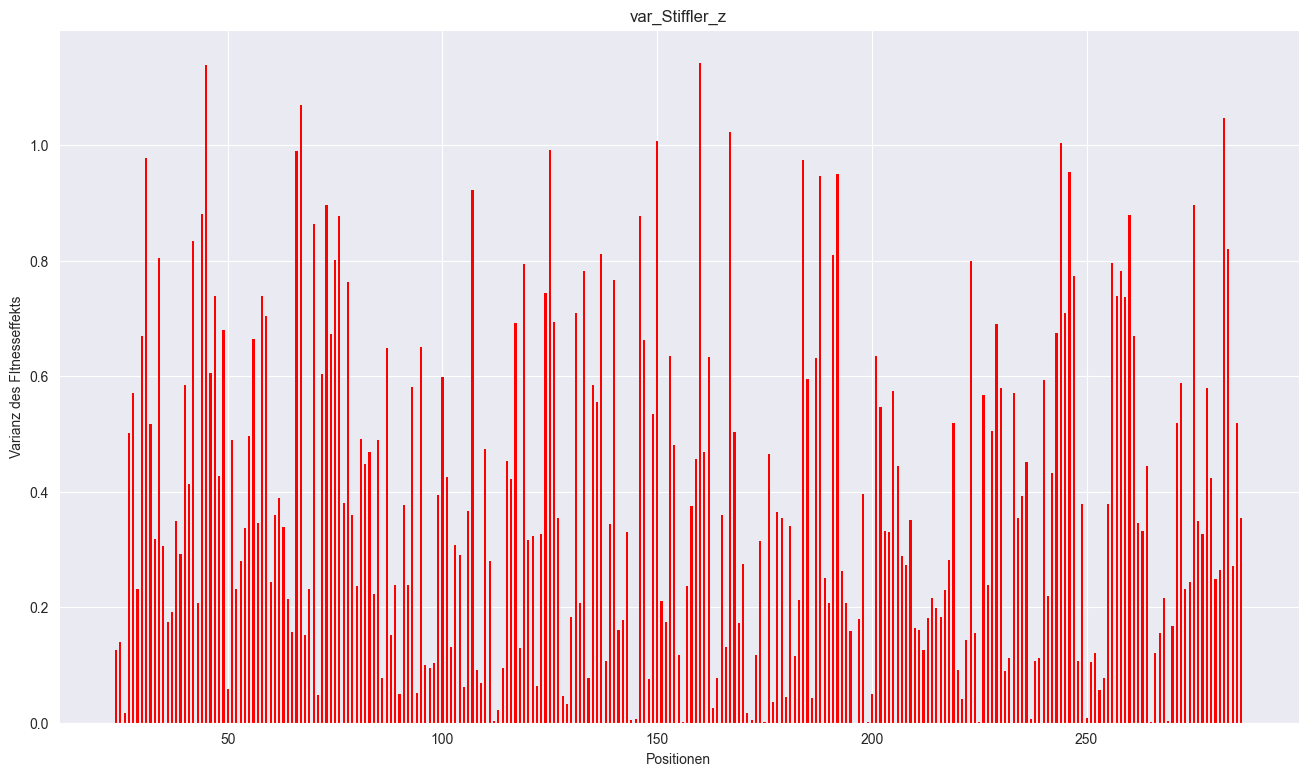

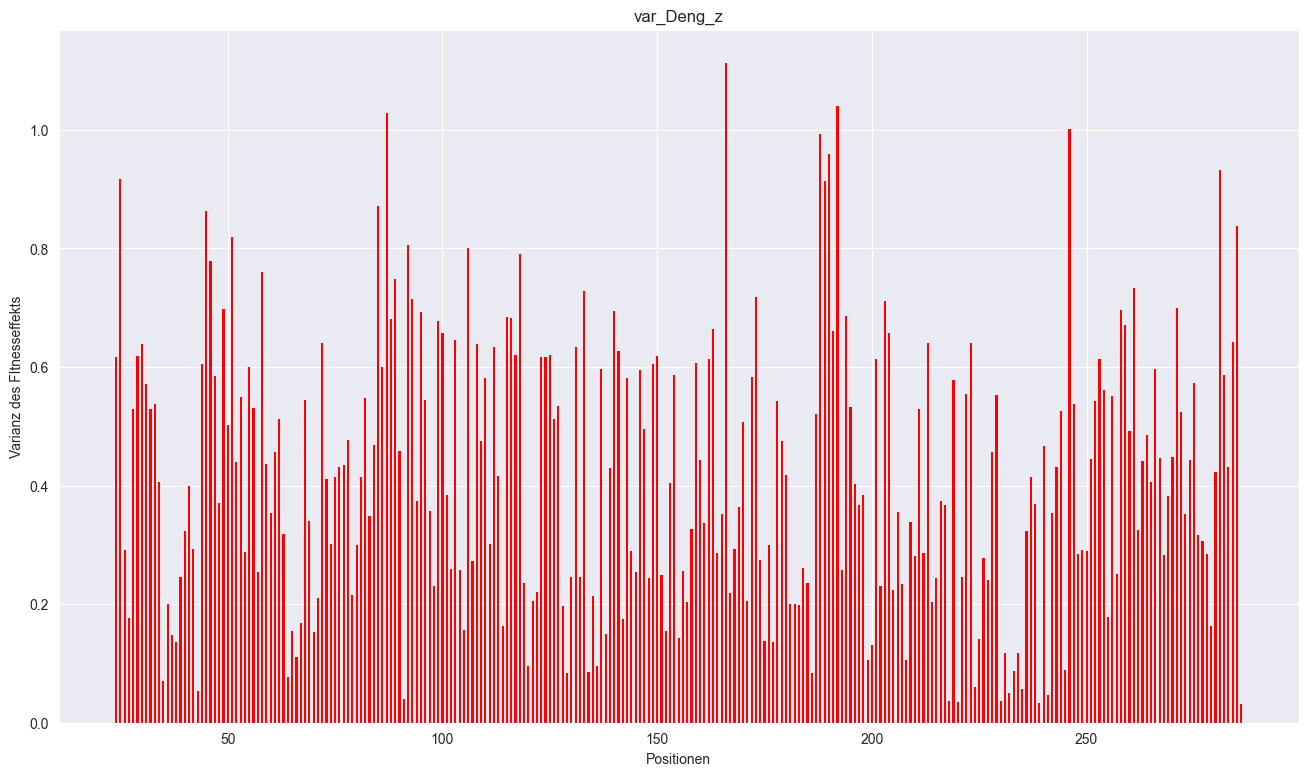

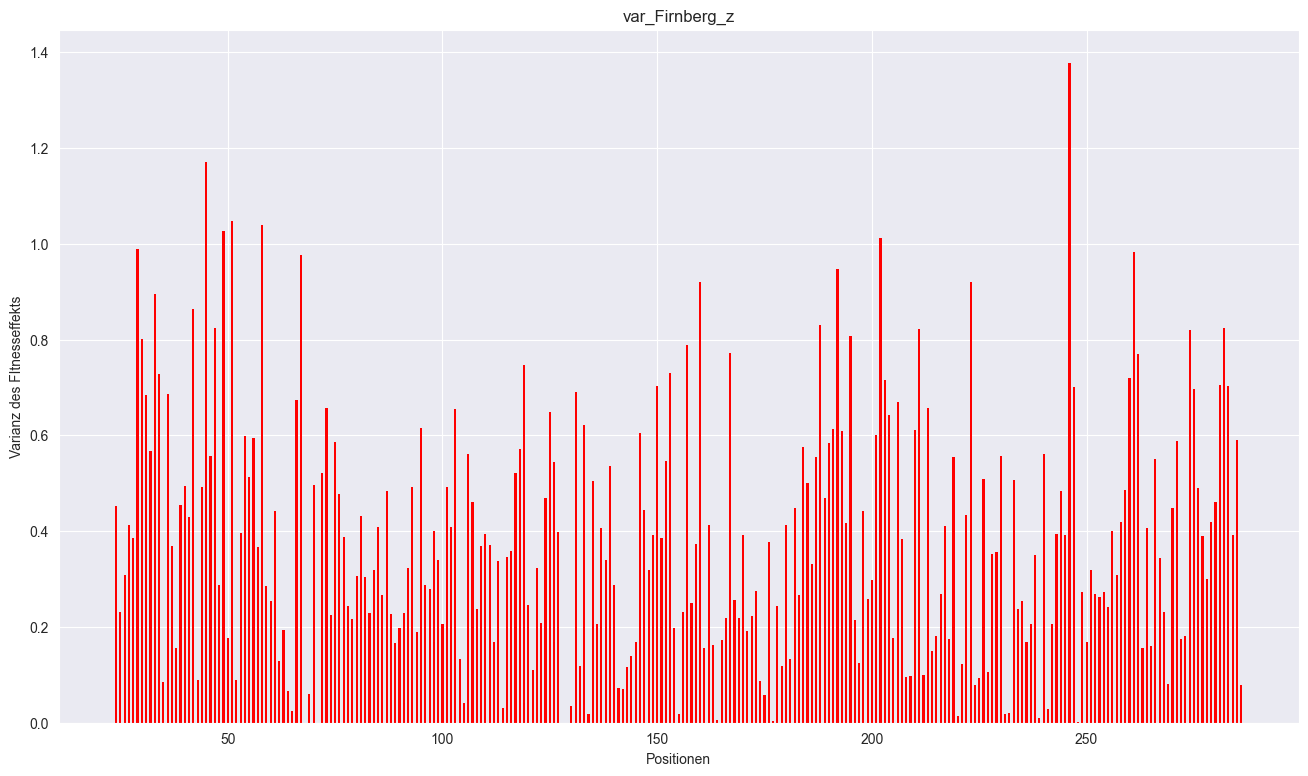

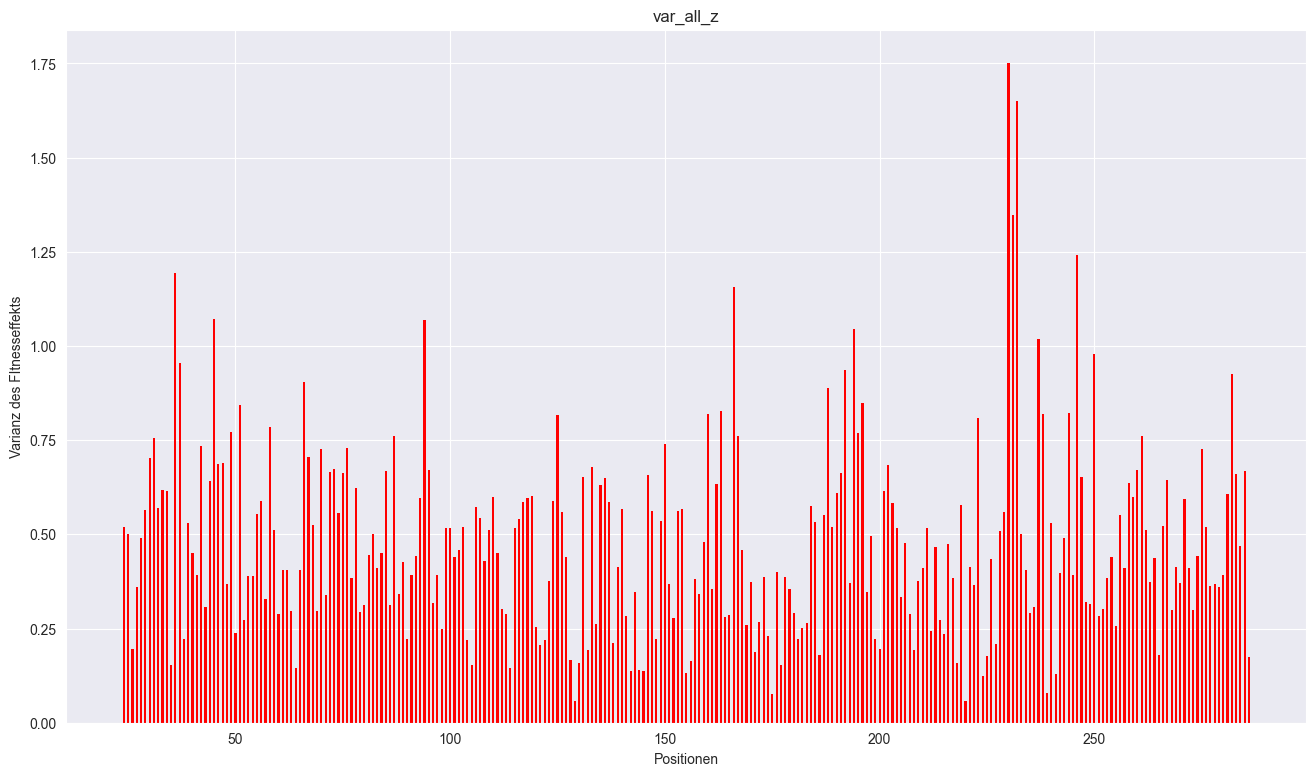

In [34]:
#Es liegen jedoch teilweise große Varianzen in den einzelnen Positionseffekten vor, sodass es ausschlaggebend ist, welche AMinosäure an einer Position eingebracht wird. In diesen Fällen kann nicht partout von einer "robusten" oder "fragilen" Positionen gesprochen werden. Die Varianzen, also die Unschärfe in der Zuweiseung der Attribute "robust" oder "fragil" zu einer Position werdne im FOlgenden geplottet.
#Plotten der Positionseffekte.
for i in range(0, len(position_means_Z.columns)//2):
    j=i*2 +1
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Varianz des FItnesseffekts")
    plt.title(position_means_Z.columns[j])
    plt.show()

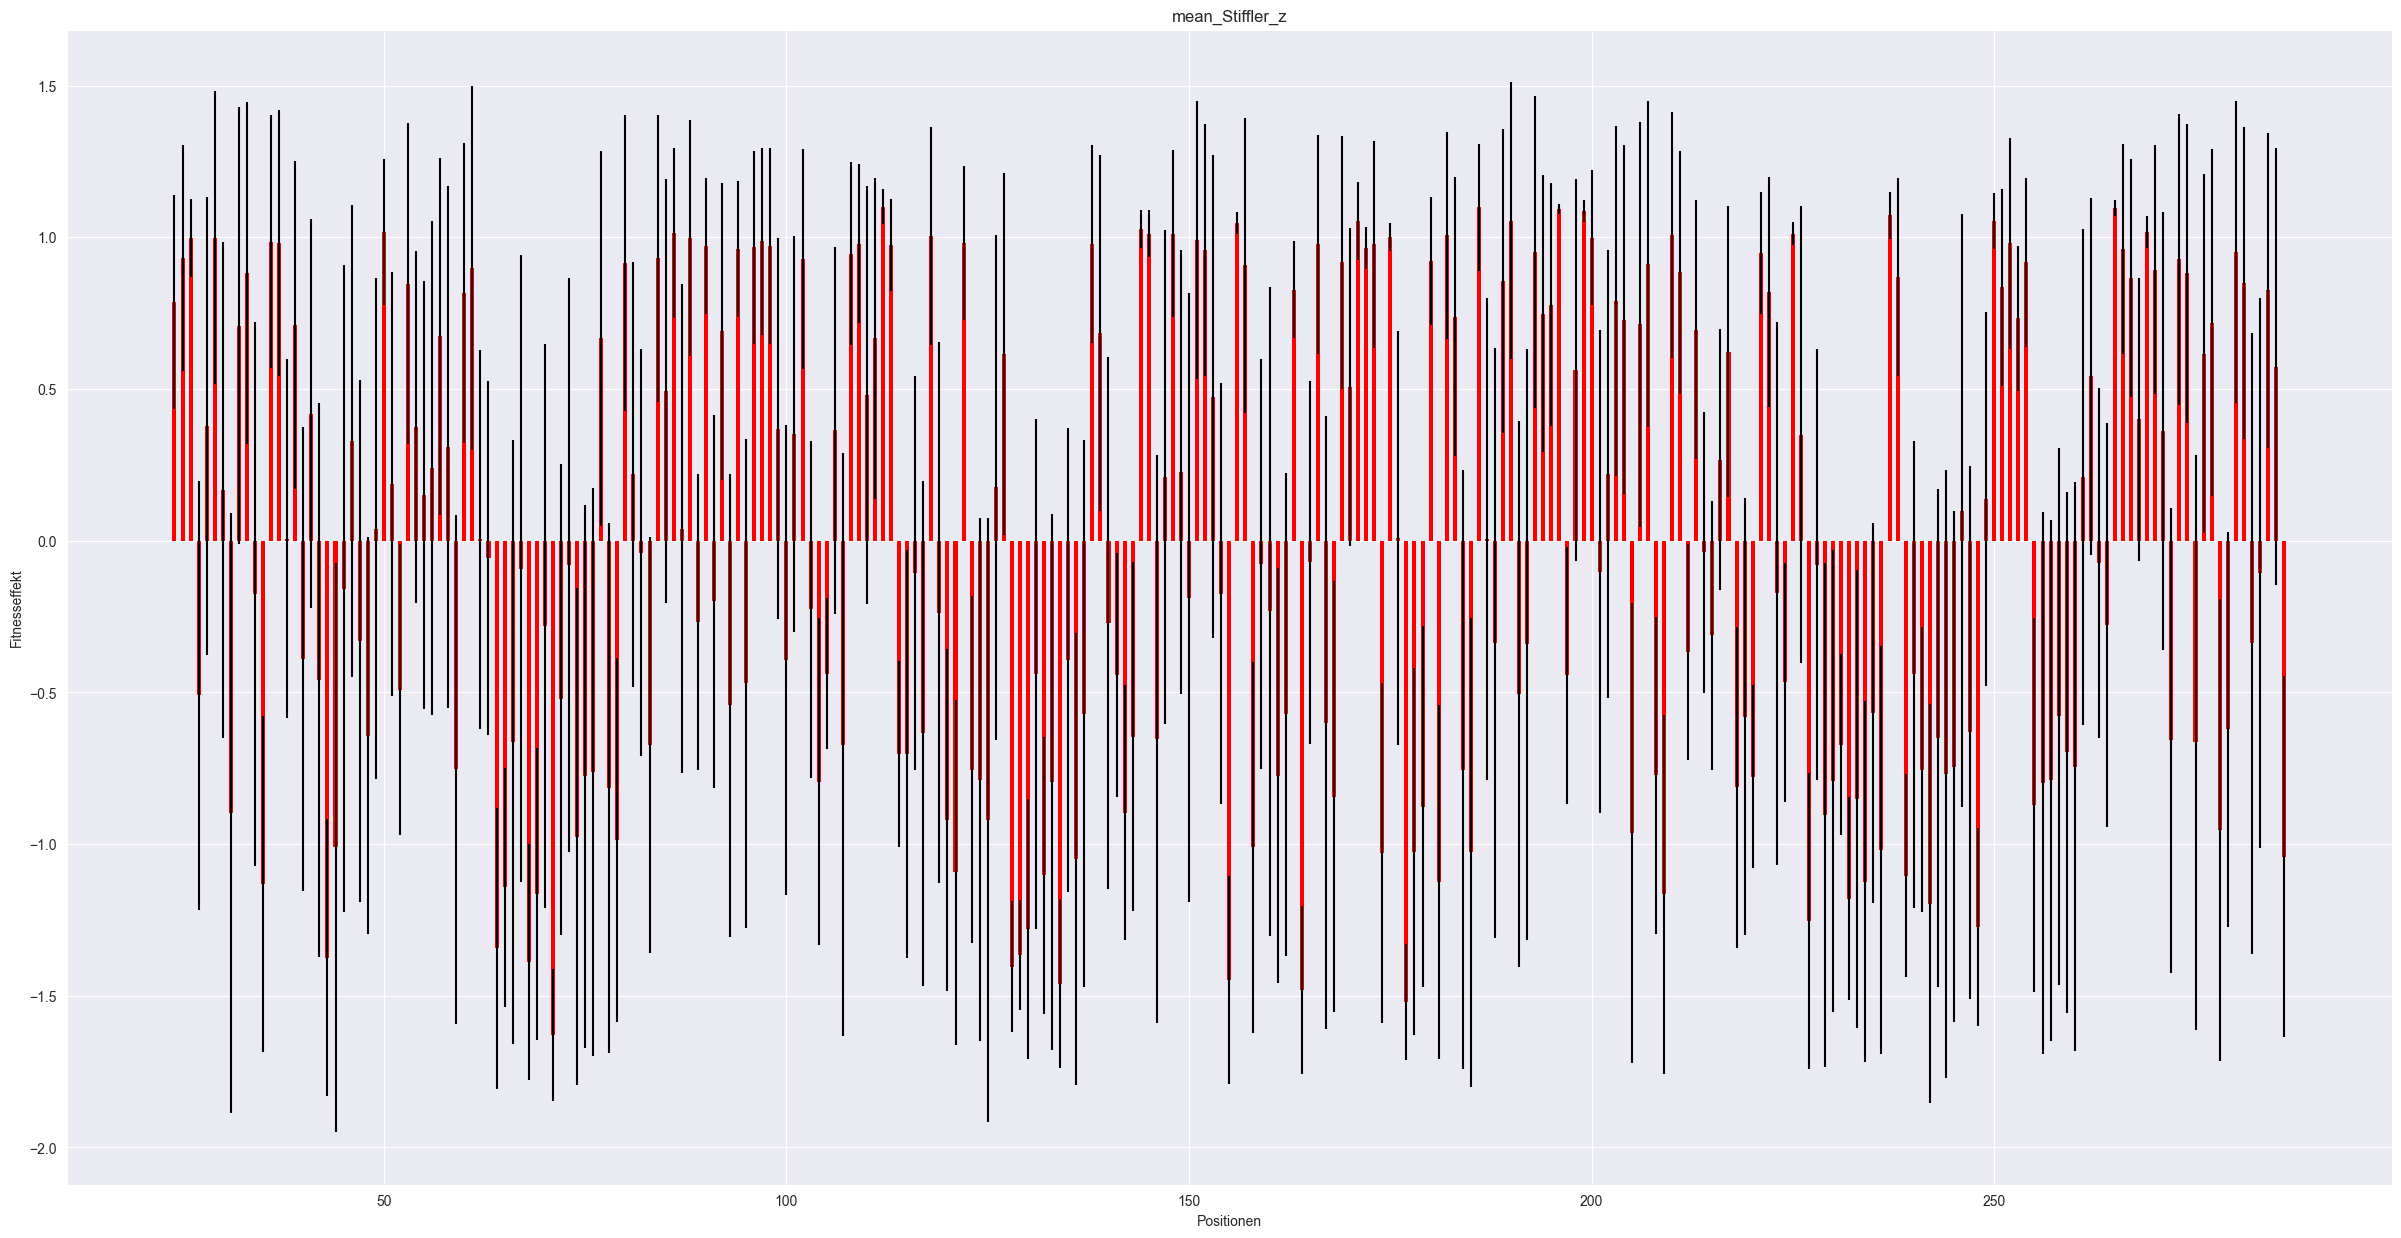

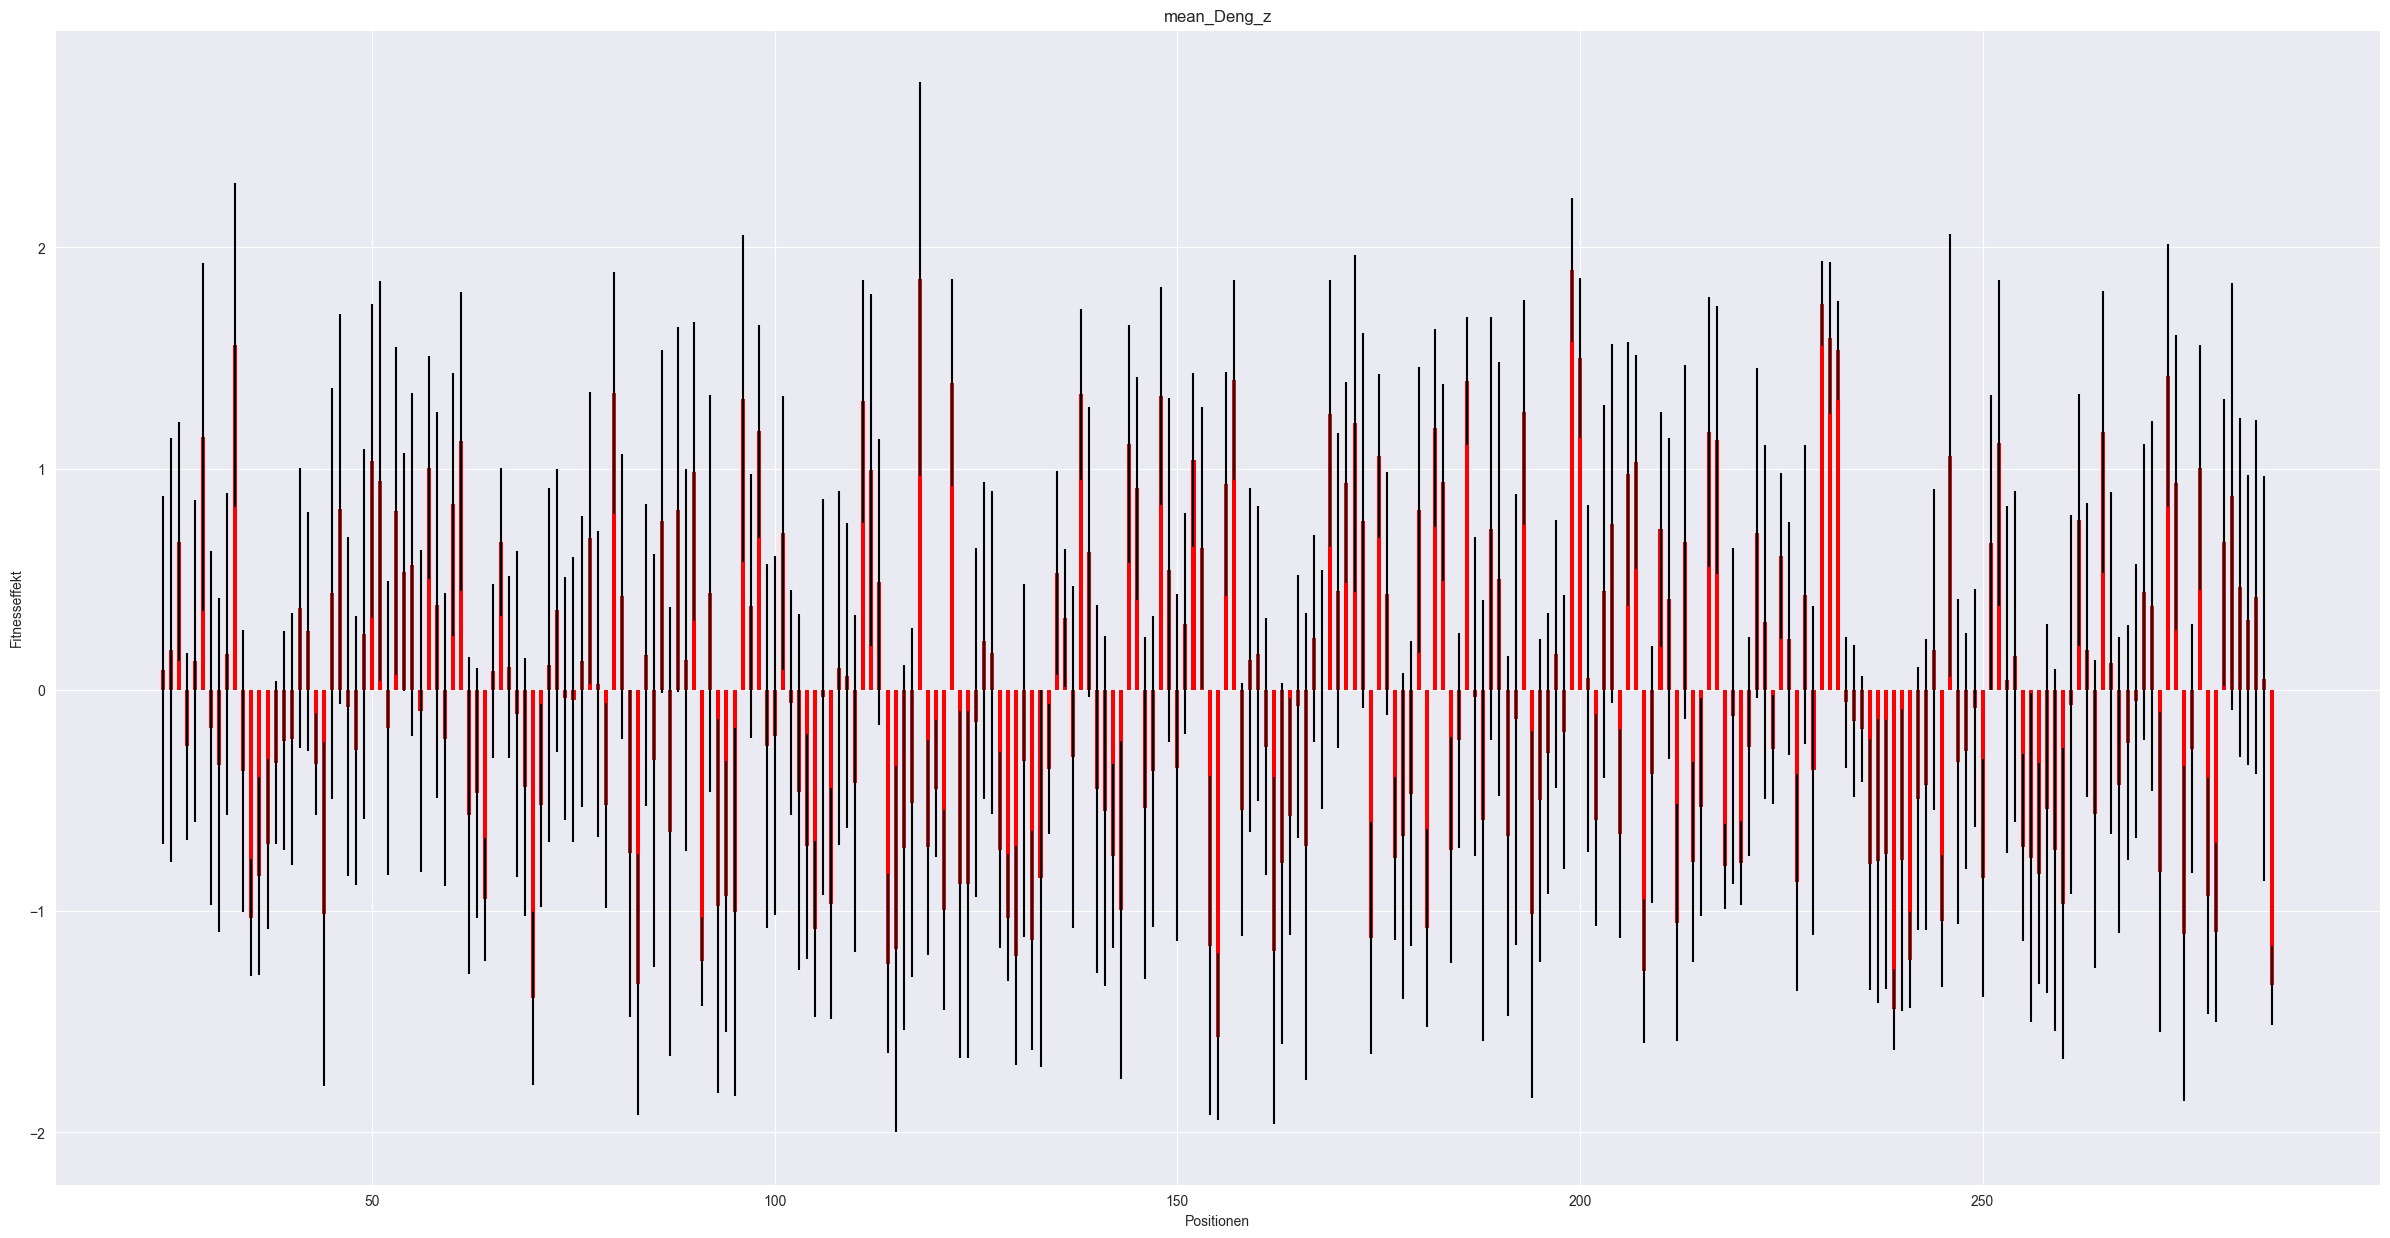

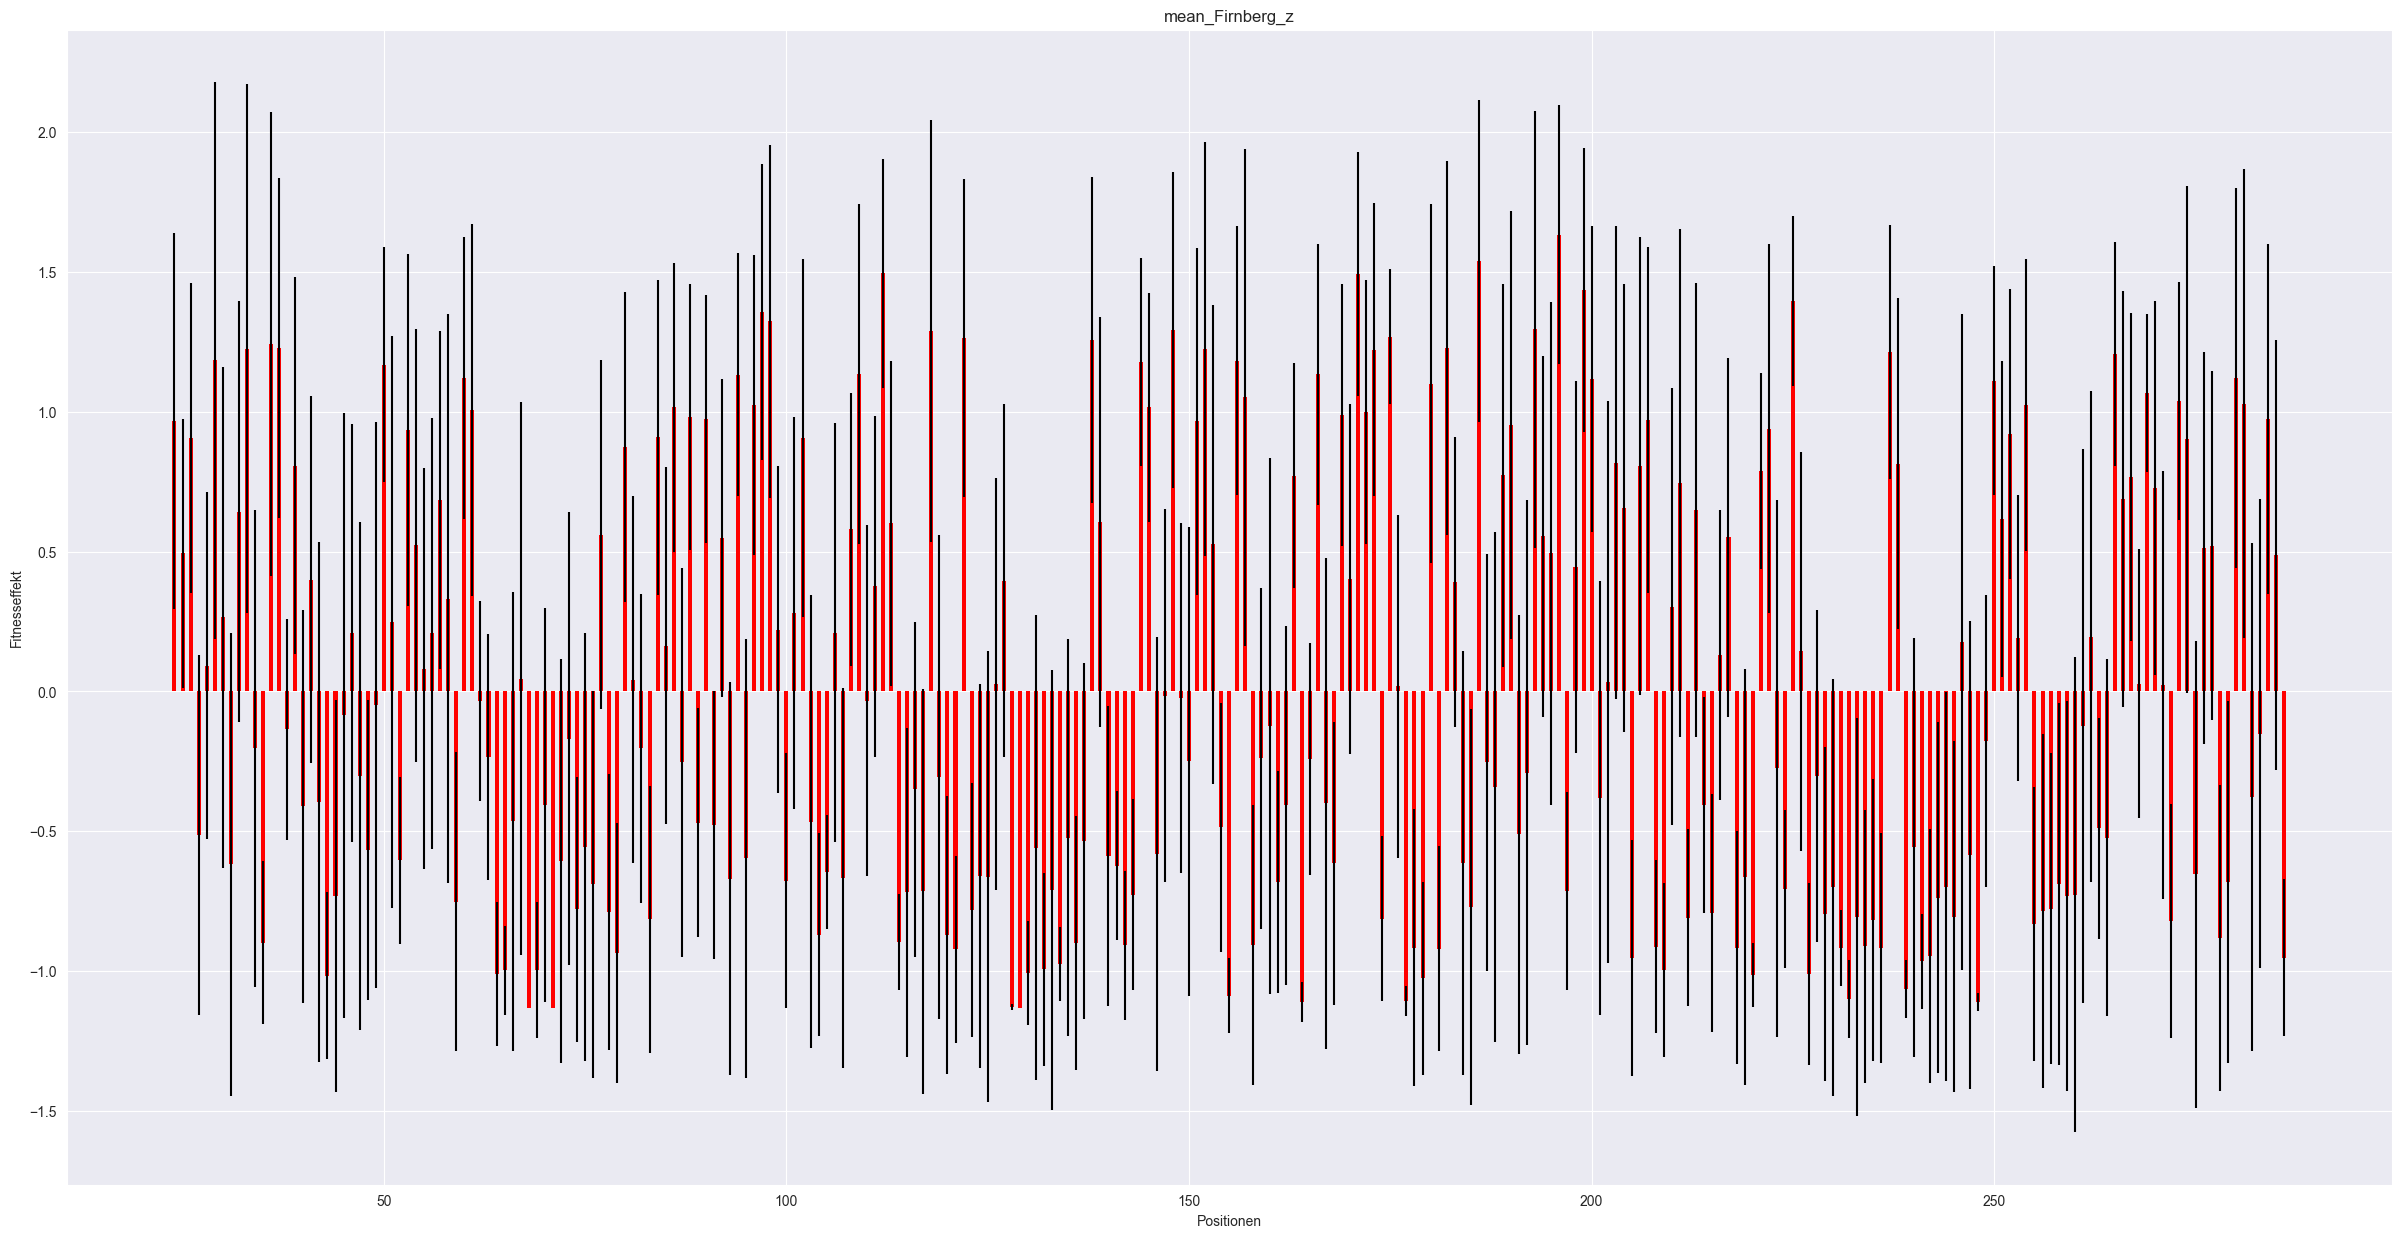

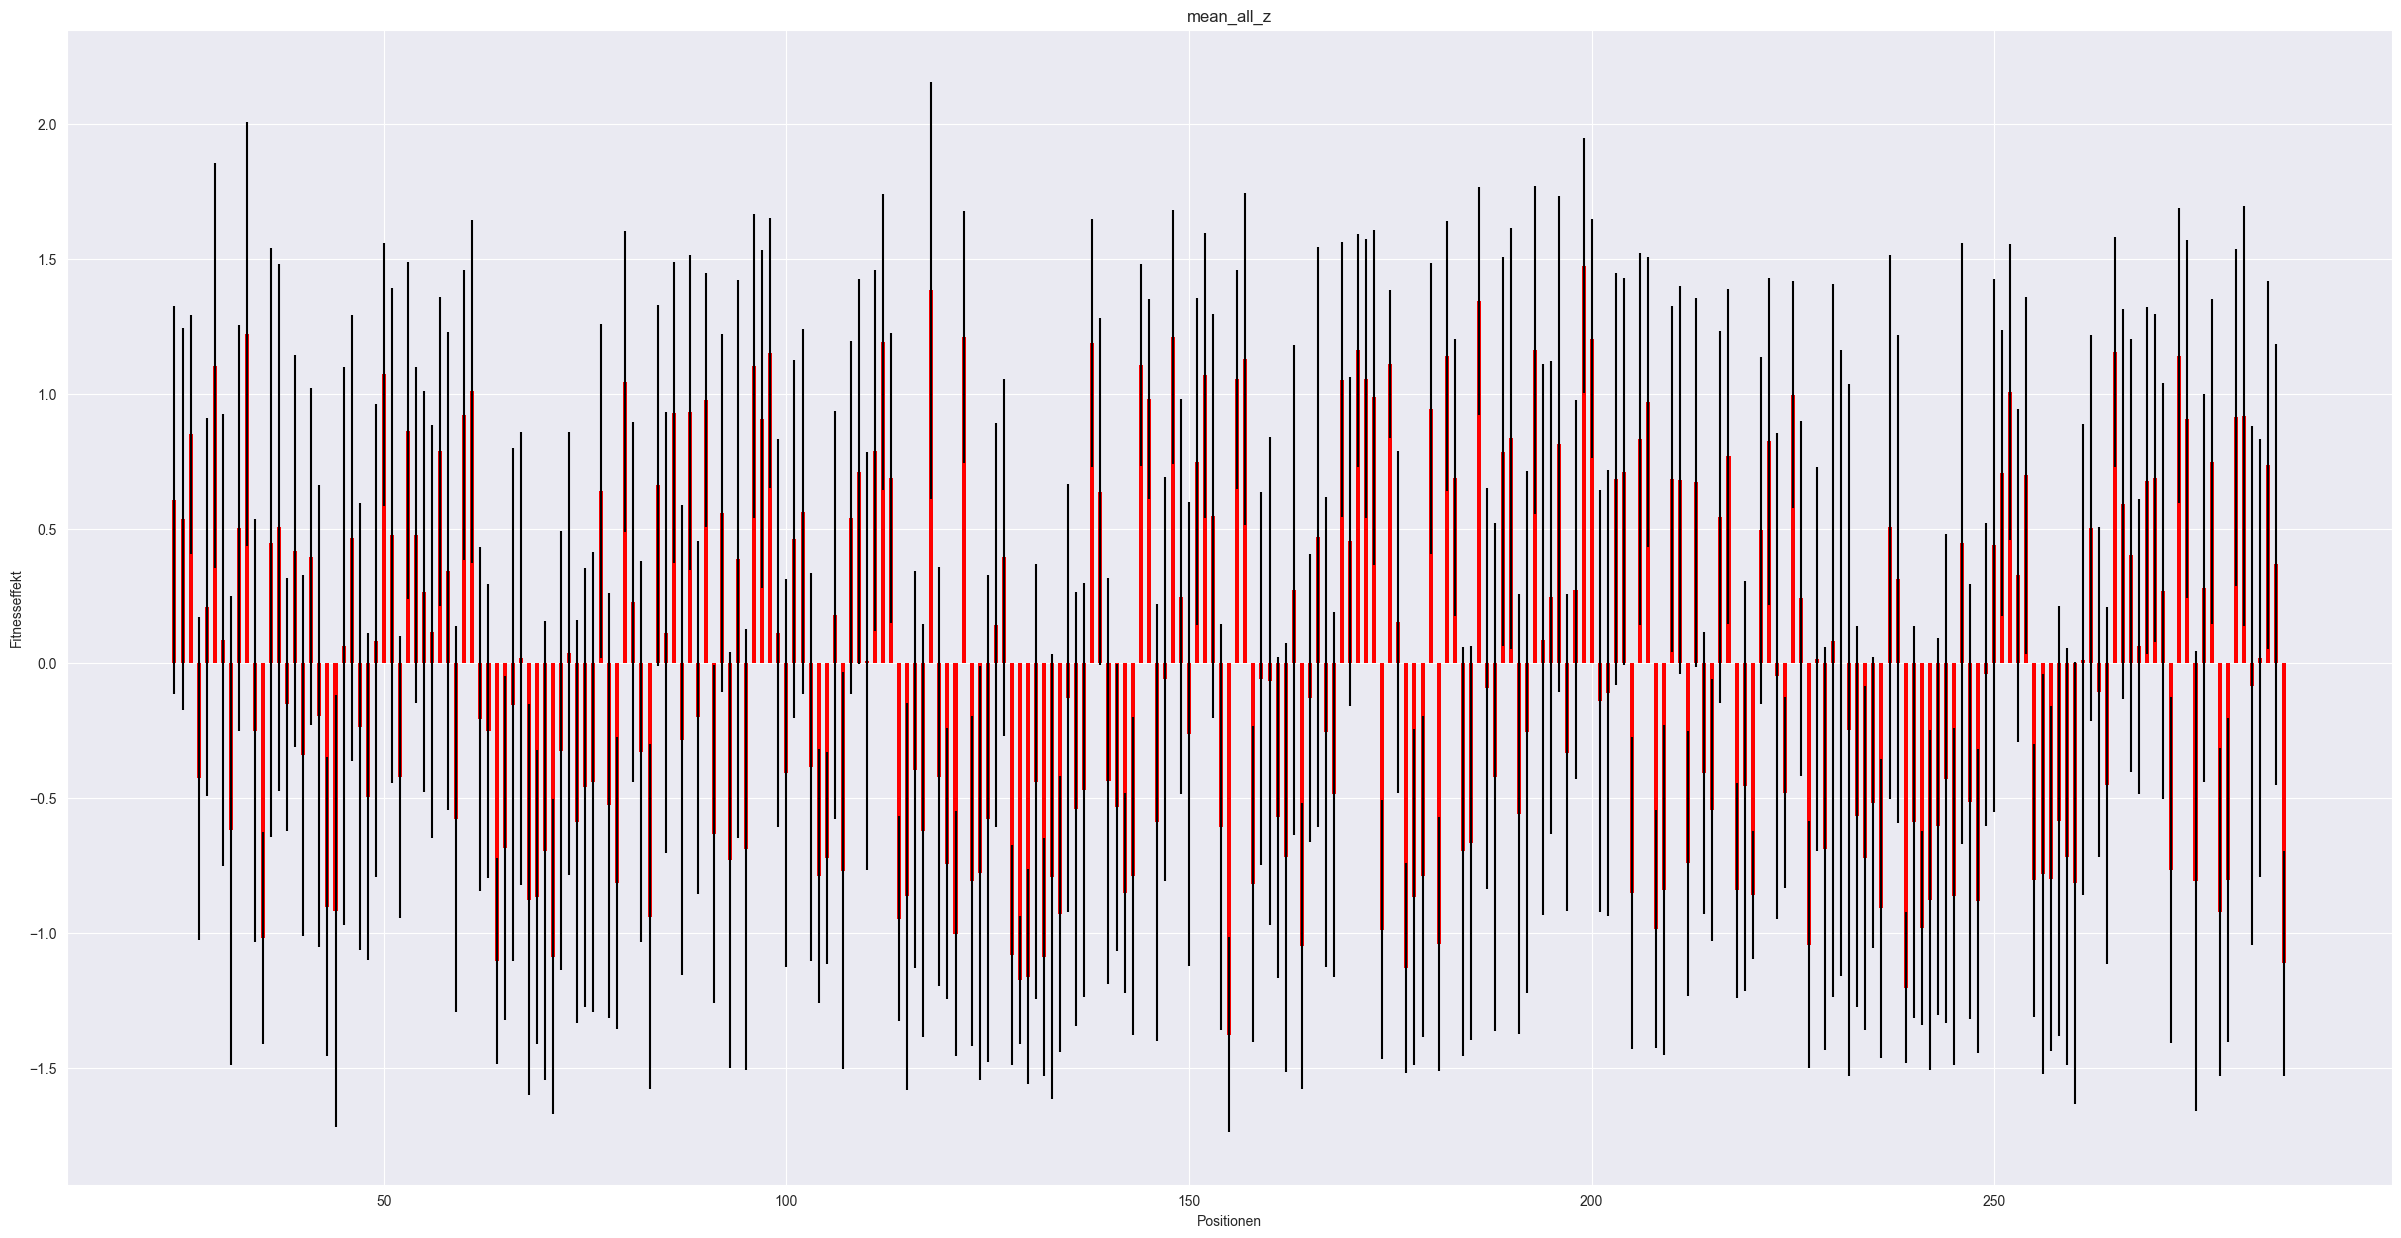

In [35]:
#Die Varianzen können auch als Fehlerbalken in die Positionseffekt-Plots eingebunden werden.
import numpy as np

for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index

    values_to_round = position_means_Z.iloc[:, j+1].apply(lambda x: round(x, 5))  # Werte auf 5 Nachkommastellen runden
    error_values = np.sqrt(values_to_round)  # Wurzel auf gerundete Werte anwenden

    plt.figure(figsize=(30,15))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0, yerr=error_values)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()


Im Folgenden wird versucht, Positionseffekte präziser als durch den bloßen Mittelwert von Fitnesseffekten an einer Position darzustellen.
Zunächst werden hierfür nur die jeweils höchsten und niedrigsten 25% der Mutanten aus den einzelnen Datensätzen betrachtet. Für jede Position wird ermittelt, wie viel % der ihr zugehörigen Mutanten (also Mutanten mit Mutationen an der jw. Position) unter den top/bottom 25% liegen. Diese Zahl ist eine erste Näherung an die "robustness" bzw. "fragility" der Positionen. Je größer der Anteil der Mutanten einer Position in den top 25% Mutante ist, desto robuster ist diese gegen Mutationen. ANalog entspricht der Anteil einer Position an den bottom 25% ihrer Fragilität.

In [36]:
#look at tops:
top_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
top_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in top_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = top_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    top_25_DSlist.append(new_DS)
top_25_DSlist

for i in range(0, len(top_25_DSlist)):
    t=top_25_DSlist[i].quantile(0.75)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    top_25_DSlist[i].iloc[:,0] = top_25_DSlist[i].iloc[:,0] >= t #give attribute True oder False to each mutatnt (True means it is above quantile threshhold, False means it is not)

#look at bottoms:
bottom_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
bottom_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in bottom_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = bottom_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    bottom_25_DSlist.append(new_DS)
bottom_25_DSlist

for i in range(0, len(bottom_25_DSlist)):
    t=bottom_25_DSlist[i].quantile(0.25)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    bottom_25_DSlist[i].iloc[:,0] = bottom_25_DSlist[i].iloc[:,0] <= t #setz True of False to each mutatnt (True means it is above below threshhold, False means it is not)

#Positionsefekt von 0 bis 1:
top_25_DSlist_poseff=[]
for i in range (0, len(top_25_DSlist)):
    x=top_25_DSlist[i].iloc[:,0].groupby(top_25_DSlist[i].iloc[:,1])
    top_25_DSlist_poseff.append(x.mean()) #Durchschnitt der Werte in der Fitness-Value Spate (T or F, je nachdem ob Wert über oder unter Treshhold war) für jede Position. Ein Durchschnitt von 1 würde bedeuten, dass alle Mutanten True wären, also < Treshhold sind. So werden Positionen mit wenigen Mutanten nicht übersehen.

    bottom_25_DSlist_poseff=[]
for i in range (0, len(bottom_25_DSlist)):
    x=bottom_25_DSlist[i].iloc[:,0].groupby(bottom_25_DSlist[i].iloc[:,1])
    bottom_25_DSlist_poseff.append(x.mean())

#Anteil der Mutanten jeder Position die in den top/bottom 25% in den versch. Datensätzen liegen.
top_25_DSlist_poseff
bottom_25_DSlist_poseff

[Position
 24          0.0
 25          0.0
 26          0.0
 27     0.368421
 28     0.052632
          ...   
 282    0.473684
 283    0.210526
 284    0.052632
 285    0.105263
 286    0.736842
 Name: Stiffler, Length: 263, dtype: object,
 Position
 24     0.166667
 25          0.0
 26          0.0
 27     0.105263
 28     0.157895
          ...   
 282    0.052632
 283    0.052632
 284    0.052632
 285    0.210526
 286         1.0
 Name: Deng, Length: 263, dtype: object,
 Position
 24          0.0
 25          0.0
 26          0.0
 27     0.157895
 28     0.052632
          ...   
 282    0.421053
 283    0.157895
 284    0.052632
 285    0.052632
 286    0.578947
 Name: Firnberg, Length: 263, dtype: object,
 Position
 24          0.0
 25          0.0
 26          0.0
 27     0.263158
 28     0.052632
          ...   
 282    0.105263
 283    0.105263
 284    0.052632
 285    0.105263
 286    0.842105
 Name: mean, Length: 263, dtype: object]

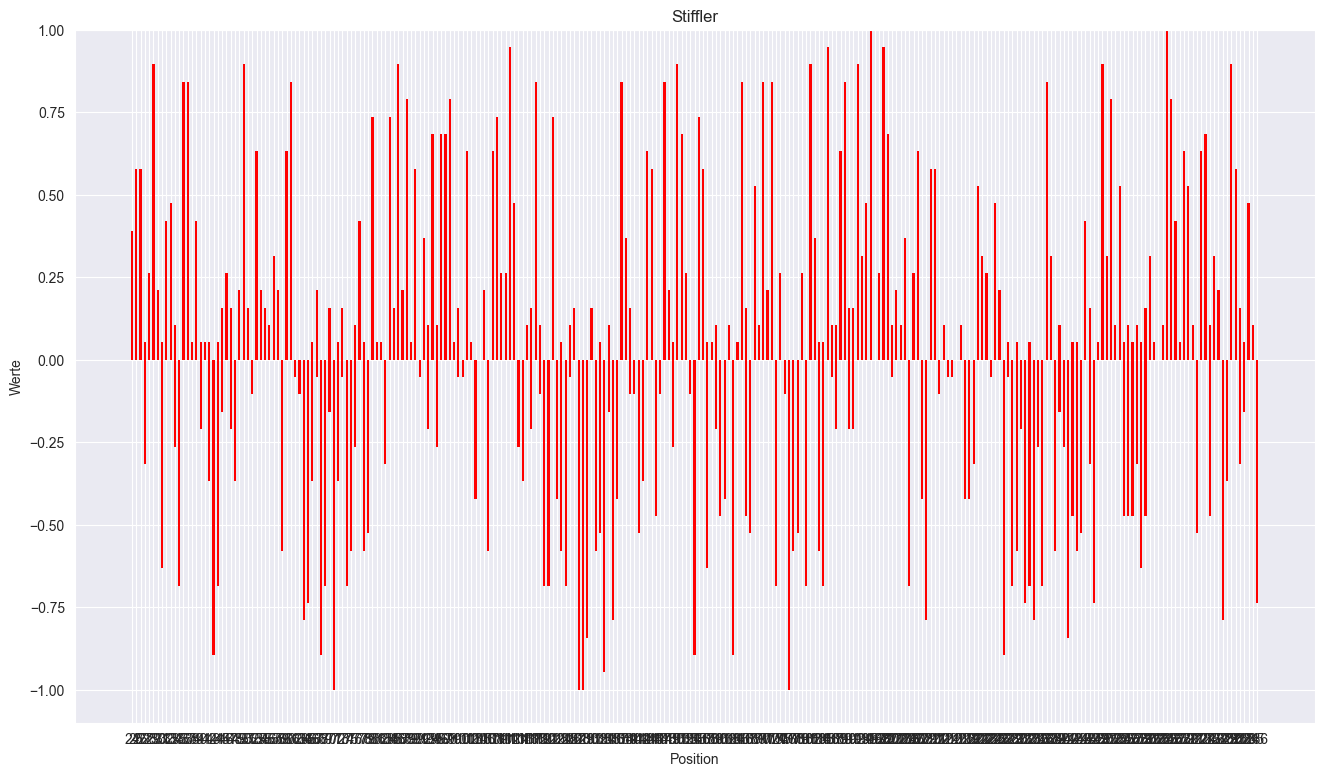

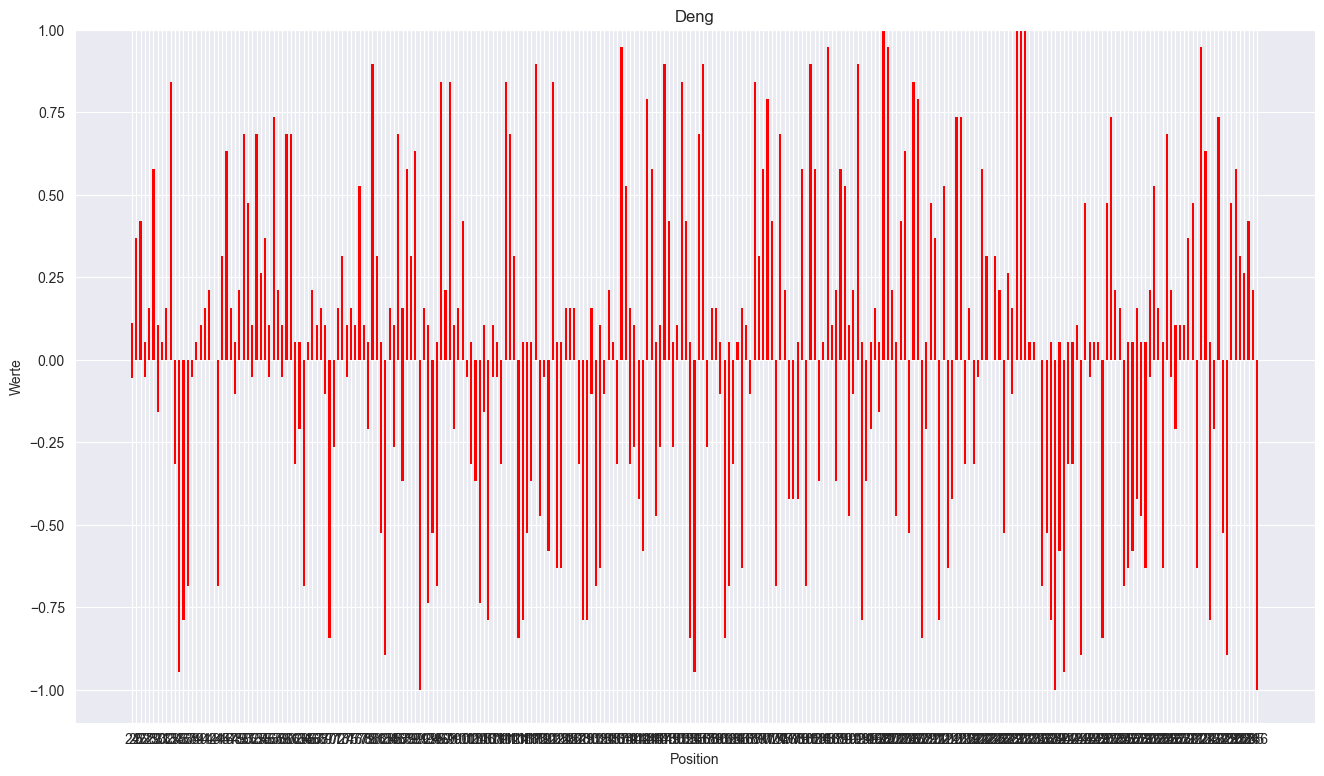

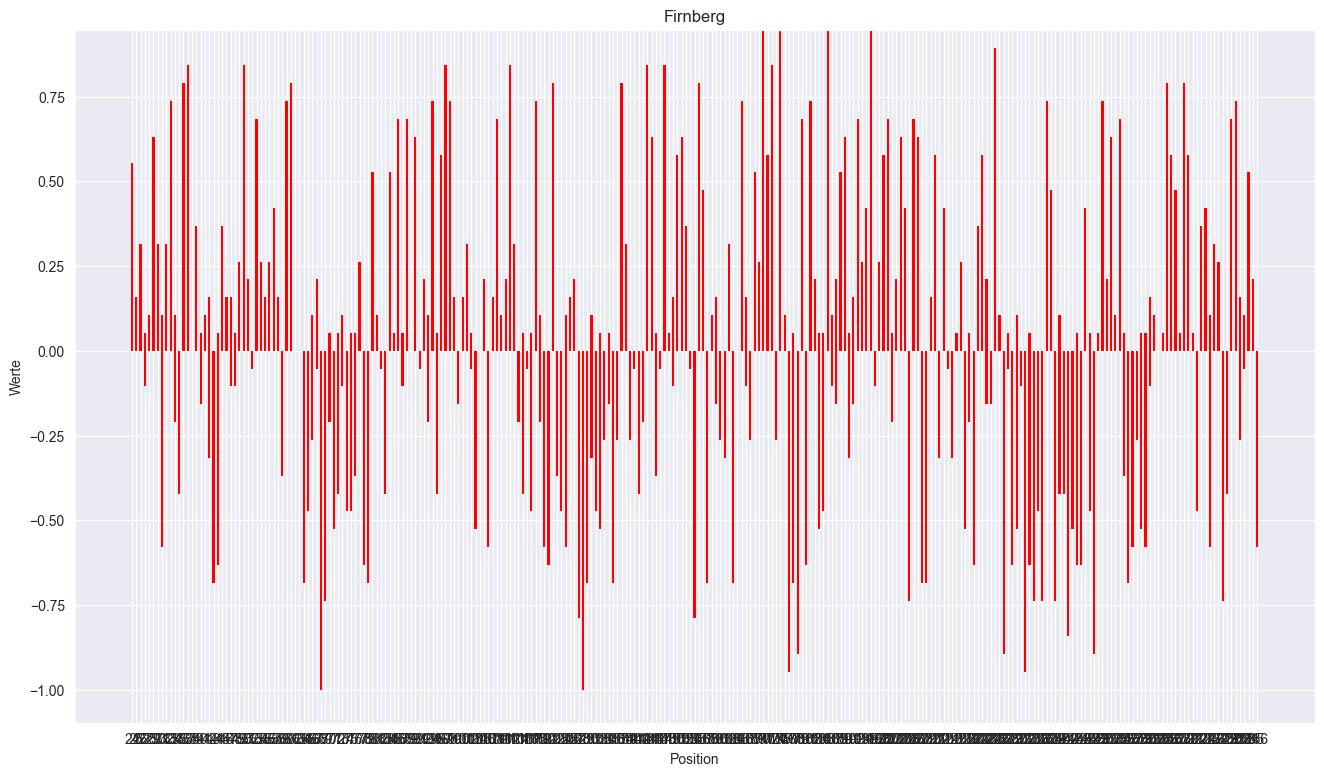

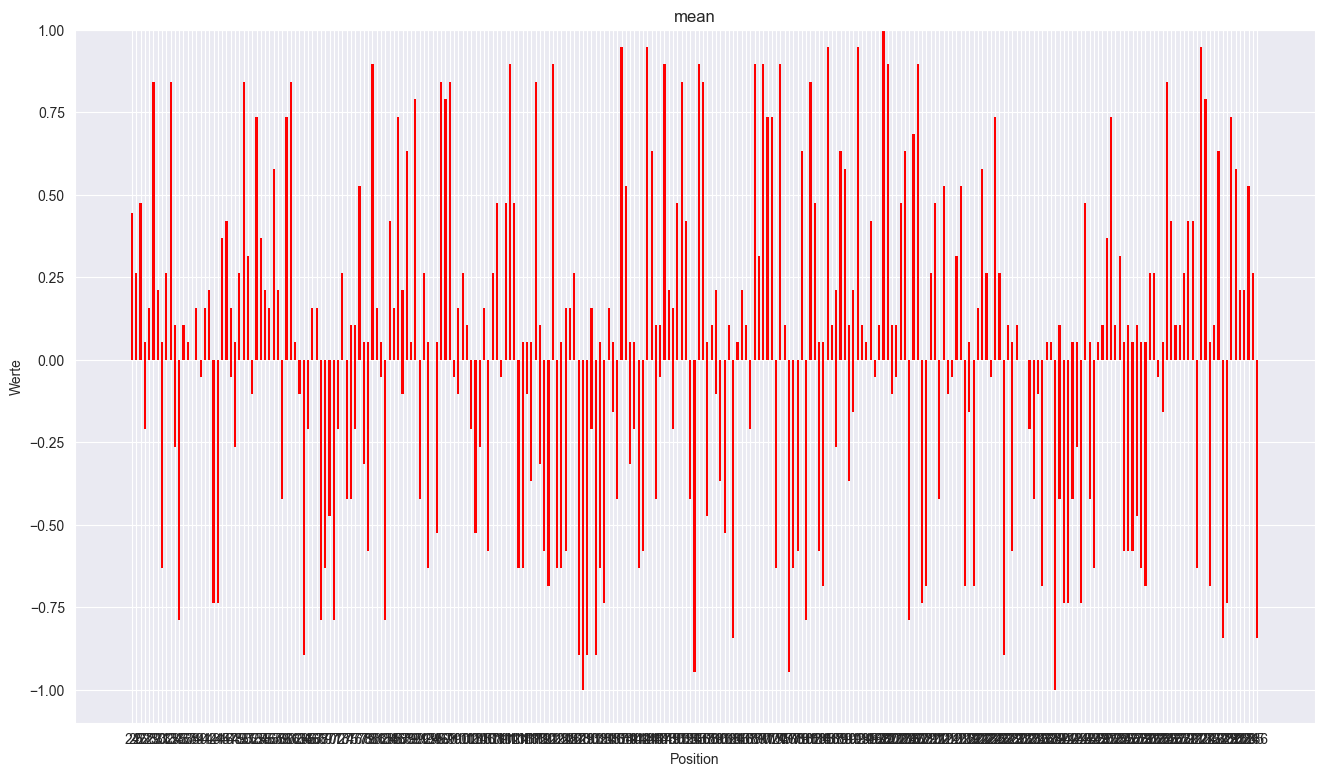

In [37]:
#plotten: (Robustness (Top) nach oben, Fragility (Bottom) nach unten):

positions = top_25_DSlist_poseff[0].index

for i in range (0, len(top_25_DSlist)):
    top_values = top_25_DSlist_poseff[i]
    bottom_values = bottom_25_DSlist_poseff[i]*-1

# Breite der Balken

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_25.columns[i])

# Plot anzeigen
    plt.show()


Ein cutoff bei den top/bottom 25% zu setzen ist jedoch mehr oder wneiger willkürlich (dies wurde zwar zB auch durch Leander et al. getan, jedoch dort auch unbegründet). Daher wird im Folgenden eine Metrik entwickelt, die die Anteile der Mutanten einer Position an den top/bottom x% für alle möglichen x zusammenfasst. Dabei wird zunächst der Anteil der Mutanten jeder Position an den top/bottom 50% ermittelt, da bspw. die top 51% bereits einige der unterdurchschnittlichen Mutanten beinhalten würde. Die Anteile für die top/bottom 49%, 48%, ..., 1% werden ermittelt und in einem DataFrame gespeichert. So ergibt sich für jede Position eine hypothetische Kurve bei der der Anteil ihrer Mutanten unter den top x% Mutanten mit steigendem x abnimmt. Genauso ergibt sich eine hypothetische Kurve für jede Position bei der der Anteil ihrer Mutanten unter den bottom x% Mutanten mit sinkendem x abnimmt. Die Fläche unter diesen hypothetischen Kurven (Are Under Curve AUC) kann als Metrik für die Robustheit (top-Kurve) und Fragilität (bottom-Kurve) für jede Position genutzt werden. Die sich so ergebenen "AUC values" werden in top/bottom_auc_df gespeichert.

In [38]:
#F/R [%] für jede Position bei verschiedenen Quantilen berechnen
#tops:

top_Fit=mergedc_z_mv.copy()
top_Fit_DSlist=[]
for col in top_Fit.columns[:4]:
    new_DS = top_Fit[[col, 'Position']]
    top_Fit_DSlist.append(new_DS)



top_Fit_Qlist=[]
top_used_quantiles=[]
for i in range(0, len(top_Fit_DSlist)):
    top_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,50):
        top_Fit_Qlist[i].insert(j, top_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+50)/100 #iterate over Quantiles 75% - 99%
        t=top_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        top_Fit_Qlist[i][j].iloc[:,0]=(top_Fit_Qlist[i][j].iloc[:,0] >= t)
        if i == len(top_Fit_DSlist)-1:
            top_used_quantiles.append(q) #keep used quantiles for later weighting of quantile values

#calculate top % for each position for different quantile-threshholds for each dataset

top_Fit_Qlist_poseff=[]
for i in range (0, len(top_Fit_DSlist)):
    top_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,50):
        x=top_Fit_Qlist[i][j].iloc[:,0].groupby(top_Fit_Qlist[i][j].iloc[:,1])
        top_Fit_Qlist_poseff[i].insert(j, x.mean())

top_Fit_Qlist_poseff

#bottoms:
bottom_Fit=mergedc_z_mv.copy()
bottom_Fit_DSlist=[]
for col in bottom_Fit.columns[:4]:
    new_DS = bottom_Fit[[col, 'Position']]
    bottom_Fit_DSlist.append(new_DS)



bottom_Fit_Qlist=[]
bottom_used_quantiles=[]
for i in range(0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,50):
        bottom_Fit_Qlist[i].insert(j, bottom_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+1)/100 #iterate over Quantiles 1% - 25%
        t=bottom_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        bottom_Fit_Qlist[i][j].iloc[:,0]=(bottom_Fit_Qlist[i][j].iloc[:,0] <= t)
        if i == len(bottom_Fit_DSlist)-1:
            bottom_used_quantiles.append(q)

#calculate bottom % for each position for different quantile-threshholds for each dataset

bottom_Fit_Qlist_poseff=[]
for i in range (0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,50):
        x=bottom_Fit_Qlist[i][j].iloc[:,0].groupby(bottom_Fit_Qlist[i][j].iloc[:,1])
        bottom_Fit_Qlist_poseff[i].insert(j, x.mean())


In [39]:
#extract F/R % for each position at different quantiles for each dataset to plot curve and calculate area under curve as R/F-score of position:

#tops:
top_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(top_Fit_DSlist)): #iterate over datasets
    m=i*2
    for k in range(0,len(top_Fit_Qlist_poseff[0][0])): #iterate over positions
        top_pos_eff_quantiles=[]
        for j in range(0,50): #iterate over quantiles
            top_pos_eff_quantiles.append(top_Fit_Qlist_poseff[i][j].iloc[k])
        top_pos_eff_quantiles_df.iloc[k,m]=top_pos_eff_quantiles
top_pos_eff_quantiles_df = top_pos_eff_quantiles_df.drop(top_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


#bottoms:

bottom_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(bottom_Fit_DSlist)): #iterate over datasets
   m=i*2
   for k in range(0,len(bottom_Fit_Qlist_poseff[0][0])): #iterate over positions
     bottom_pos_eff_quantiles=[]
     for j in range(0,50): #iterate over quantiles
        bottom_pos_eff_quantiles.append(bottom_Fit_Qlist_poseff[i][j].iloc[k])
     bottom_pos_eff_quantiles_df.iloc[k,m]=bottom_pos_eff_quantiles
bottom_pos_eff_quantiles_df = bottom_pos_eff_quantiles_df.drop(bottom_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


In [40]:
#the pos_eff_quantiles_dfs contains for each Dataset and each position the F/R %s for Quantiles 50% - 99% bzw. 1%-50%
#now we want to fit curves to each position in each dataset
from scipy.integrate import trapz

top_auc_df = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df.index.name = 'Position'

bottom_auc_df = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df.index.name = 'Position'


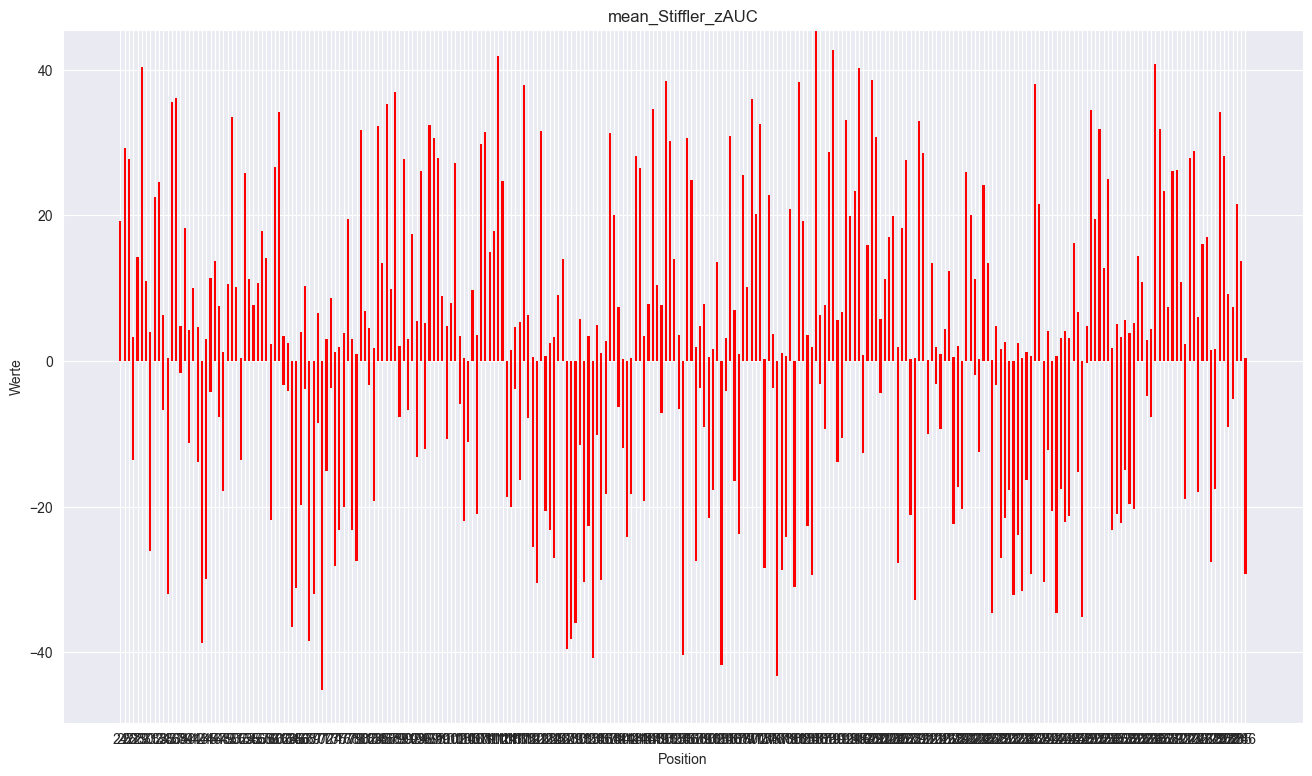

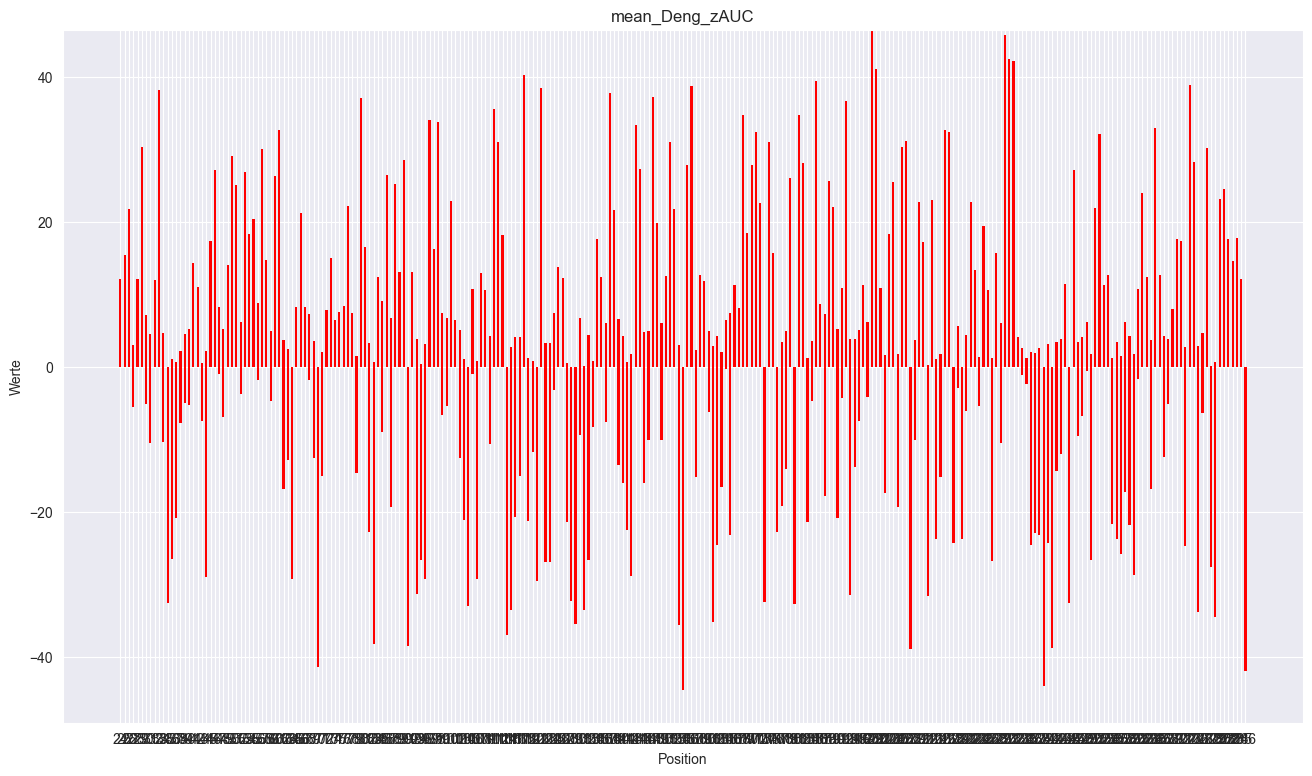

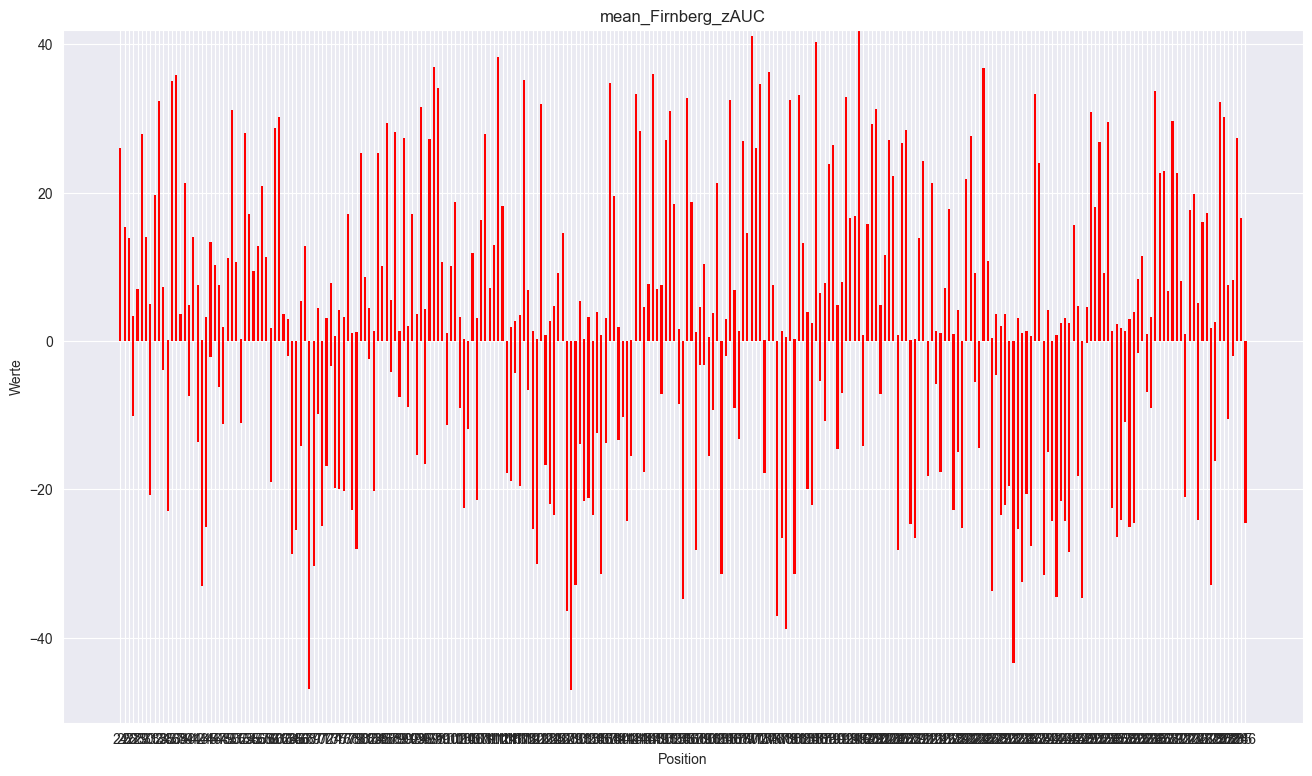

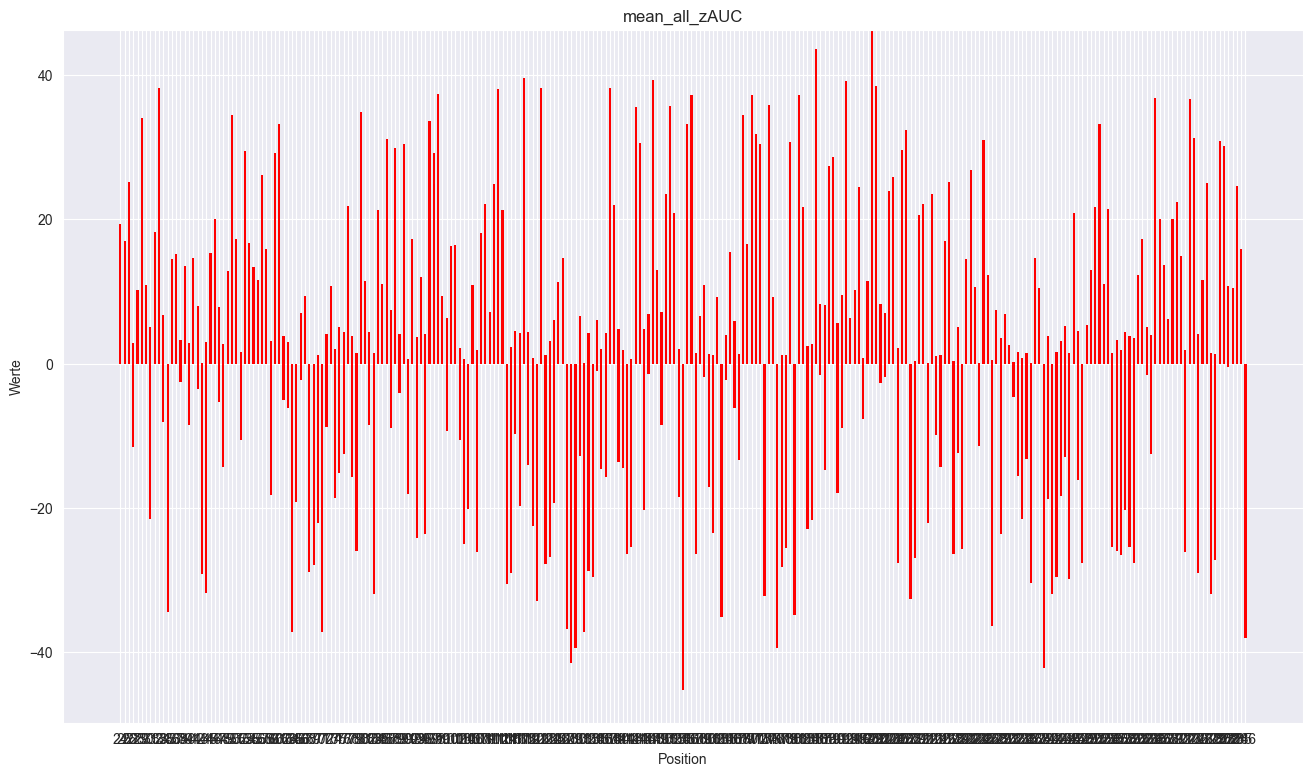

In [41]:
#plotten

positions = top_auc_df.index

for i in range (0, len(top_auc_df.columns)):
    top_values = top_auc_df.iloc[:,i]
    bottom_values = bottom_auc_df.iloc[:,i]*-1

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df.columns[i])

# Plot anzeigen
    plt.show()

Es ließe sich argumentieren, dass mit steigendem x die Mutanten die noch unter die top/bottom x fallen bedeutsamer sein. Daher wird im Folgenden ein Gewichtungsfaktor k eingeführtm (die jeweiligen Quantilen-Werte q (bzw. 1 - x bei bottoms) werden mit der Potenz k mit den Anteilen der Mutanten einer Position an den top/bottom q (= x%) multipliziert). Mit steigendem k werden extremere Mutanten stärker gewichtet. Die sich so ergebenen "weighted AUC values" werden in top/bottom_auc_df_weighted gespeichert.

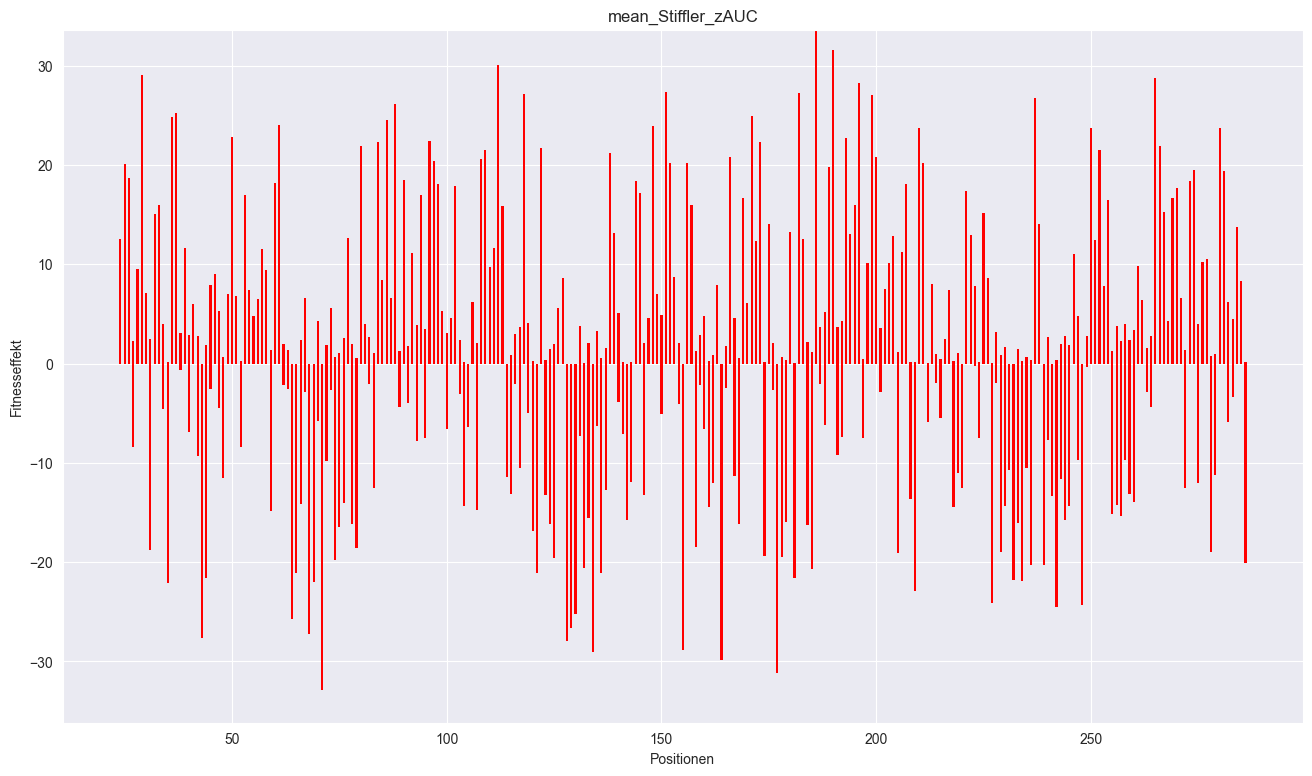

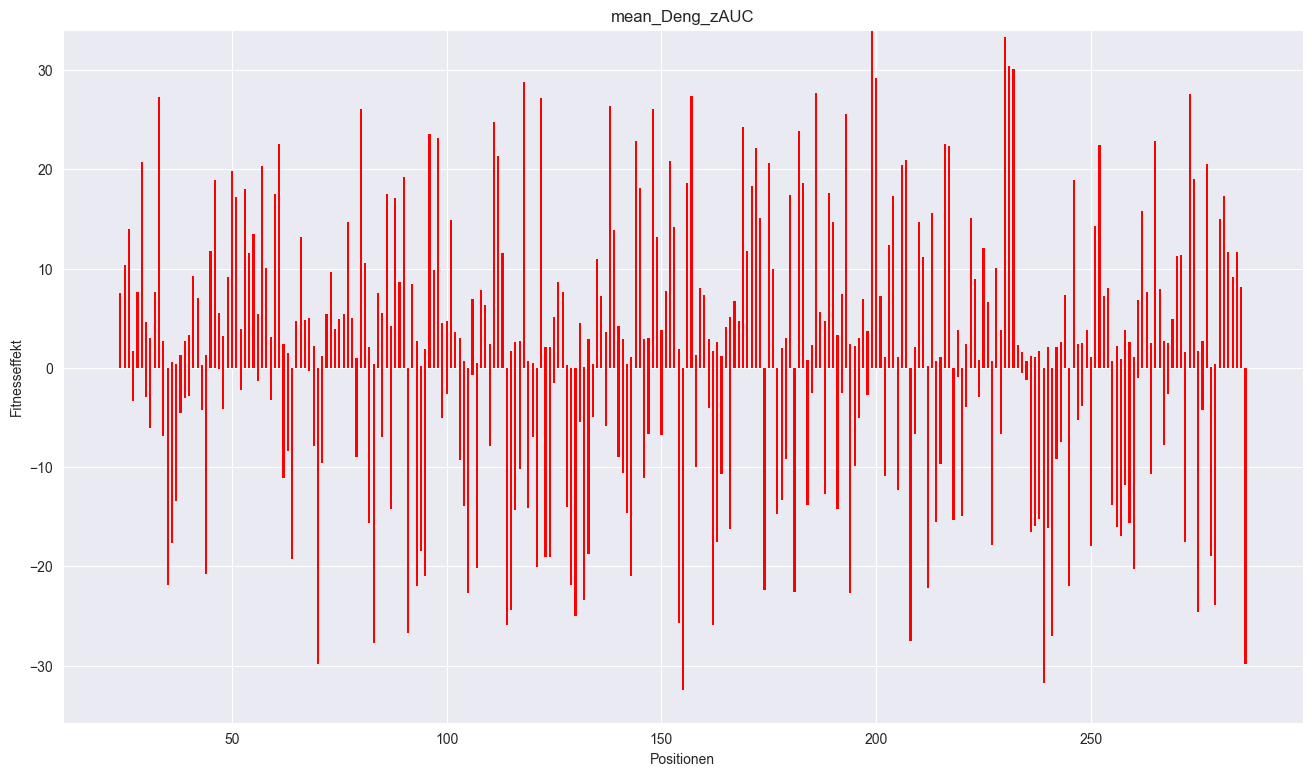

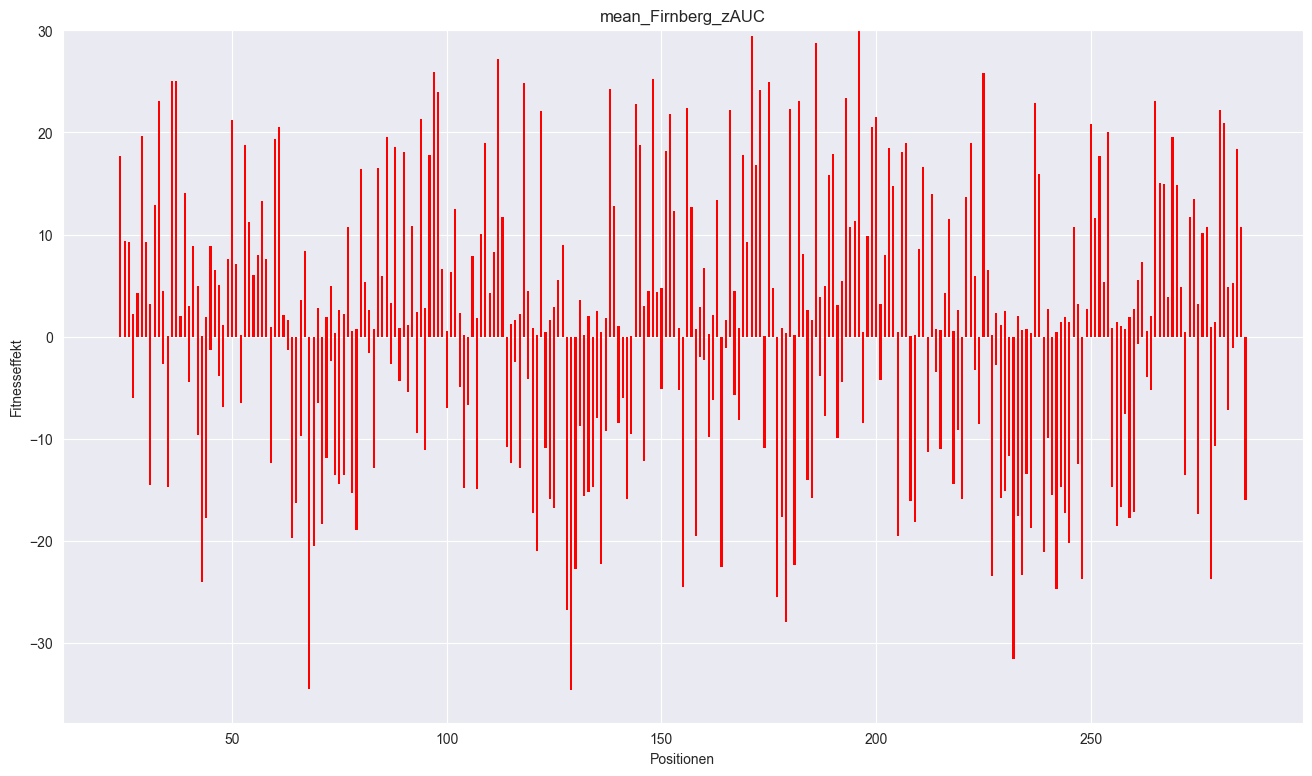

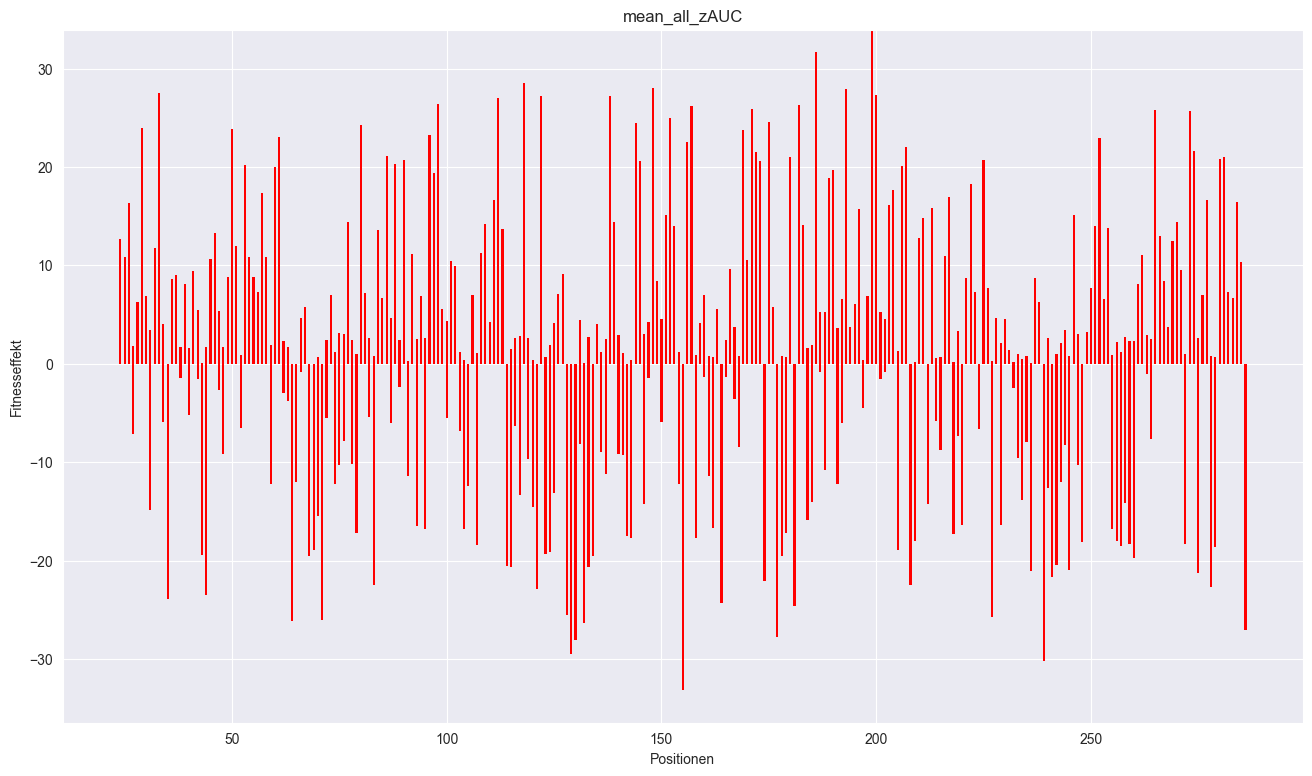

In [42]:
#extremere Werte stärer Gewichten (k=0 für ungewichtet/alle Mutanten gliechwichtig; ansosnten je höher k, desto höher gewichtet sind extremere Bereiche)
k=1

top_used_quantiles=np.array(top_used_quantiles)
bottom_used_quantiles=np.flip(top_used_quantiles)

top_pos_eff_quantiles_df_weighted=top_pos_eff_quantiles_df.copy()
for i in range(0, len(top_pos_eff_quantiles_df.columns)):
    for j in range(0, len(top_pos_eff_quantiles_df)):
        top_pos_eff_quantiles_df_weighted.iloc[j,i]=top_pos_eff_quantiles_df.iloc[j,i]*(top_used_quantiles**k)

bottom_pos_eff_quantiles_df_weighted=bottom_pos_eff_quantiles_df.copy()
for i in range(0, len(bottom_pos_eff_quantiles_df.columns)):
    for j in range(0, len(bottom_pos_eff_quantiles_df)):
        bottom_pos_eff_quantiles_df_weighted.iloc[j,i]=bottom_pos_eff_quantiles_df.iloc[j,i]*(bottom_used_quantiles**k)

#same AUC stuff as above

from scipy.integrate import trapz

top_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df_weighted.index.name = 'Position'

bottom_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df_weighted.index.name = 'Position'

#plotten
for i in range(0, len(top_auc_df_weighted.columns)):
    top_values = top_auc_df_weighted.iloc[:, i]
    bottom_values = bottom_auc_df_weighted.iloc[:, i] * -1

    xwerte = top_auc_df_weighted.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, top_values, label='Top', color='red', width=0.5, linewidth=0)
    plt.bar(xwerte, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(top_auc_df_weighted.columns[i])
    plt.show()


Der Gewichutngsfaktor k kann verschieden hoch gewählt werden. Im Verlauf des Projekts wird sowohl das Mittelwert-Modell der Positionseffekte, sowie das top/bottom-25%-Modell, das AUC-Modell und das weighted-AUC-Modell (mit verschiedenen Gewcihtungsfaktoren k) auf ihre Fähigkeit untersucht, die Robustheit bzw. Fragilität einer Position daruzstellen. Als Benchmark für diese Überprüfung wird die Korrelation der verschieden ermittelten/berechneten Werte mit der Konserviertheit der Positionen gewählt, wobei die ANnahme zugrundegelegt wird, dass fragile Positionen konservierter sein müssten als robuste Positionen.